1. There are only 12 columns with total wind generation, because they calculated it by themselves (I checked, it is just onshore + offshore, BUT, if there is a missing value in one of these, then wind generation will be also missing)

2. (from Offshore and Onshore Wind Generation). PT wind generation is almost empty (only 3 months of data), because PT_wind_offshore_generation_actual  2892 non-null.

# KEEP CEST TIMESTEMP? (BUT BRITAIN)???

# 1. First analysis of dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# TODO: delete cet_cest_timestamp
# TODO 1: Only plot for training data
# TODO 2: Perform tests only on train data

data = pd.read_csv('time_series_60min_singleindex.csv')#, parse_dates=True)

# Prepare date column
data = data.rename(columns={'utc_timestamp': 'date'})
data['date'] = pd.to_datetime(data['date']).dt.tz_localize(None)
# keep cet(cest) timestemp, because it is a real time
data = data.set_index('date').drop(['cet_cest_timestamp'], axis=1)

data.head()

AT_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   

                     AT_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   

                     BE_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
date                                                                         
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   

                     BE_wind_offshore_generation_actual  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              518.66   
2015-01-01 02:00:00                              529.46   
2015-01-01 03:00:00                              406.94   

                     BE_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             216.15   
2015-01-01 02:00:00                             237.18   
2015-01-01 03:00:00                             326.19   

                     BG_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              4585.0   
2015-01-01 02:00:00                              4440.0   
2015-01-01 03:00:00                              4418.0   

                     BG_solar_generation_actual  ...  \
date                                             ...   
2014-12-31 23:00:00                         NaN  ...   
2015-01-01 00:00:00                         NaN  ...   
2015-01-01 01:00:00                         NaN  ...   
2015-01-01 02:00:00                         NaN  ...   
2015-01-01 03:00:00                         NaN  ...   

                     SE_3_wind_onshore_generation_actual  \
date                                                       
2014-12-31 23:00:00                                  NaN   
2015-01-01 00:00:00                                  NaN   
2015-01-01 01

In [ ]:
# Creating a heatmap of a feature over hour of the day and month or weekday
# Since, the data is in UTC timeformat we first adjust the timestamp to match the original German time 
# This includes adjusting for summer time (+2 hours) and winter time (+1 hour) according to this website https://www.zeitumstellung.de/zeitumstellung-historisch-archiv.html

df['date'] = pd.to_datetime(df['date'])

# Define the date ranges according 
range1 = (
    ((df['date'] >= '2015-03-29') & (df['date'] <= '2015-10-25')) |
    ((df['date'] >= '2016-03-27') & (df['date'] <= '2016-10-30')) |
    ((df['date'] >= '2017-03-26') & (df['date'] <= '2017-10-29')) |
    ((df['date'] >= '2018-03-25') & (df['date'] <= '2018-10-28')) |
    ((df['date'] >= '2019-03-31') & (df['date'] <= '2019-10-27'))
)

# Increase the hour by 2 for dates in range1, and by 1 for others
df['date_german_time'] = df['date'] + pd.DateOffset(hours=2)
df.loc[~range1, 'date_german_time'] += pd.DateOffset(hours=1)

In [3]:
#drop_cols = [col for col in data.columns if 'capacity' in col]
#data.drop(drop_cols, axis =1, inplace=True)

Count columns that contain word load, solar and wind.
Wind has the biggest number of columns, because it is divided into offshore and onshore.
However, not all countries have offshore wind generation.

In [4]:
cols_load = [col for col in data.columns if 'load' in col]
cols_solar = [col for col in data.columns if 'solar' in col]
cols_wind = [col for col in data.columns if 'wind' in col]
print(f'Number of load columns: {len(cols_load)}\nNumber of solar columns: {len(cols_solar)}\nNumber of wind columns: {len(cols_wind)}')

Number of load columns: 57
Number of solar columns: 39
Number of wind columns: 82


List of countries that contain onshore and offshore generation.
They are then summed up to the "total wind generation".

In [5]:
cols_wind_generation = [col for col in cols_wind if 'wind_generation' in col]
cols_wind_generation

['BE_wind_generation_actual',
 'DE_wind_generation_actual',
 'DE_50hertz_wind_generation_actual',
 'DE_LU_wind_generation_actual',
 'DE_tennet_wind_generation_actual',
 'DK_wind_generation_actual',
 'DK_1_wind_generation_actual',
 'DK_2_wind_generation_actual',
 'GB_GBN_wind_generation_actual',
 'GB_UKM_wind_generation_actual',
 'NL_wind_generation_actual',
 'PT_wind_generation_actual']

In [6]:
# So, they reported as total generation only columns that have onshore and offshore generation
cols_wind_offshore_generation = [col for col in cols_wind if 'wind_offshore_generation' in col]
cols_wind_offshore_generation

['BE_wind_offshore_generation_actual',
 'DE_wind_offshore_generation_actual',
 'DE_50hertz_wind_offshore_generation_actual',
 'DE_LU_wind_offshore_generation_actual',
 'DE_tennet_wind_offshore_generation_actual',
 'DK_wind_offshore_generation_actual',
 'DK_1_wind_offshore_generation_actual',
 'DK_2_wind_offshore_generation_actual',
 'GB_GBN_wind_offshore_generation_actual',
 'GB_UKM_wind_offshore_generation_actual',
 'NL_wind_offshore_generation_actual',
 'PT_wind_offshore_generation_actual']

Calculate how many mismatches between sum of offshore and onshore, and their respective "total" wind generation.

In [7]:
check_sums = ['BE', 'DE', 'DE_50hertz', 'DE_LU', 'DE_tennet', 'DK_1', 'DK_2', 'GB_GBN', 'GB_UKM', 'NL', 'PT']

num_mismatch_sum = 0

for area in check_sums:
    offshore_col = f"{area}_wind_offshore_generation_actual"
    onshore_col = f"{area}_wind_onshore_generation_actual"
    generation_col = f"{area}_wind_generation_actual"

    # Check for missing values in offshore_col and onshore_col
    non_missing_values = (~data[offshore_col].isnull() & ~data[onshore_col].isnull())
    
    # Check whether the sum of offshore_col and onshore_col equals generation_col only when both are non-missing
    mismatch_condition = (((data[offshore_col] + data[onshore_col]).round(2) != data[generation_col]) & non_missing_values)
    
    # Count the number of mismatches
    num_mismatch = mismatch_condition.sum()
    
    print(f"Number of mismatches for {area}: {num_mismatch}")
    num_mismatch_sum += num_mismatch

print(f"Total number of rows where the sum is not equal: {num_mismatch_sum}")


Number of mismatches for BE: 303
Number of mismatches for DE: 12591
Number of mismatches for DE_50hertz: 11832
Number of mismatches for DE_LU: 4341
Number of mismatches for DE_tennet: 12822
Number of mismatches for DK_1: 6
Number of mismatches for DK_2: 10
Number of mismatches for GB_GBN: 13890
Number of mismatches for GB_UKM: 12509
Number of mismatches for NL: 11766
Number of mismatches for PT: 0
Total number of rows where the sum is not equal: 80070


Max difference between sum of onshore and offshore, and their respective "total" wind generation column.

In [8]:
from numpy.testing import assert_almost_equal

# Iterate over each area
for area in check_sums:
    offshore_col = f"{area}_wind_offshore_generation_actual"
    onshore_col = f"{area}_wind_onshore_generation_actual"
    generation_col = f"{area}_wind_generation_actual"
    
    # Filter the DataFrame based on non-missing values in both offshore and onshore columns
    non_missing_values = ~data[[offshore_col, onshore_col]].isnull().any(axis=1)
    filtered_data = data[non_missing_values]
    
    # Calculate the sum of offshore and onshore columns
    sum_offshore_onshore = filtered_data[offshore_col] + filtered_data[onshore_col]
    
    # Calculate the difference between the sum of offshore and onshore and generation columns
    diff = sum_offshore_onshore - filtered_data[generation_col]

    print(f'Max difference for {area}:', diff.max())
    print(f'Min difference for {area}:', diff.min())
    
    # Assert that the difference is almost equal to zero
    # assert_almost_equal(diff.values, 0)

Max difference for BE: 3.000195647473447e-09
Min difference for BE: -2.9999682737980038e-09
Max difference for DE: 1.0
Min difference for DE: -69.0
Max difference for DE_50hertz: 1.0
Min difference for DE_50hertz: -1.0
Max difference for DE_LU: 1.0
Min difference for DE_LU: -1.0
Max difference for DE_tennet: 1.0
Min difference for DE_tennet: -1.0
Max difference for DK_1: 2.9999682737980038e-09
Min difference for DK_1: -2.9999682737980038e-09
Max difference for DK_2: 1.0001031114370562e-09
Min difference for DK_2: -1.0001031114370562e-09
Max difference for GB_GBN: 1.0
Min difference for GB_GBN: -1.0
Max difference for GB_UKM: 10.0
Min difference for GB_UKM: -1.0
Max difference for NL: 1.0
Min difference for NL: -1.0
Max difference for PT: 4.547473508864641e-13
Min difference for PT: -4.547473508864641e-13


 Check, maximum missing values (in offshore or onshore) with "total" wind generation missing. 
 They are the same (except GB_UKM).

In [9]:
for area in check_sums:
    max_missing = max(data[f"{area}_wind_offshore_generation_actual"].isna().sum(), data[f"{area}_wind_onshore_generation_actual"].isna().sum())
    ready_col = data[f"{area}_wind_generation_actual"].isnull().sum()
    print(f"{area} max missing in offshore or onshore: {max_missing}, total col: {ready_col}")

BE max missing in offshore or onshore: 3935, total col: 3935
DE max missing in offshore or onshore: 75, total col: 75
DE_50hertz max missing in offshore or onshore: 1, total col: 1
DE_LU max missing in offshore or onshore: 32855, total col: 32855
DE_tennet max missing in offshore or onshore: 1, total col: 1
DK_1 max missing in offshore or onshore: 3, total col: 3
DK_2 max missing in offshore or onshore: 3, total col: 3
GB_GBN max missing in offshore or onshore: 41, total col: 41
GB_UKM max missing in offshore or onshore: 128, total col: 129
NL max missing in offshore or onshore: 1967, total col: 1967
PT max missing in offshore or onshore: 47509, total col: 47509


# 2. Analysis of countries and zones in dataset

In [10]:
data_areas = pd.read_csv('areas.csv')

In [11]:
data_areas.head()

area ID ISO 3166-1 alpha-2 MapCode ENTSO-E primary AreaName ENTSO-E  \
0      AT                 AT              AT                  Austria   
1      BA                 BA             NaN                      NaN   
2      BE                 BE              BE                  Belgium   
3      BG                 BG              BG                 Bulgaria   
4      CH                 CH              CH              Switzerland   

  primary concept  EU memberstate  EU inside  15min  30min 60min  ...  \
0         country            True       True   True  False  True  ...   
1         country           False      False  False  False  True  ...   
2         country            True       True  False  False  True  ...   
3         country            True       True  False  False  True  ...   
4         country           False      False  False  False  True  ...   

  control area market balance area load from ENTSO-E TP  \
0          APG                 APG                 True   
1      NOS BiH             NOS BiH                False   
2         Elia                Elia                 True   
3          ESO                 ESO                 True   
4    swissgrid           swissgrid                 True   

  generation from ENTSOE-TP price from ENTSO-E TP generation from TSO  \
0                      True                  True                True   
1                     False                 False               False   
2                      True                 False               False   
3                      True                 False               False   
4                      True                 False               False   

  price from TSO  load from ENTSO-E data portal  load from TSO  \
0          False                           True          False   
1          False                           True          False   
2          False                           True          False   
3          False                           True          False   
4          False                           True          False   

   Capacity from OPSD  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 25 columns]

The dataset contains the data on countries level, as well as other levels.

In [12]:
data_areas['primary concept'].unique()

array(['country', 'control area', 'bidding zone', 'region',
       'market balance area', 'bidding zone aggregation'], dtype=object)

82 unique area IDs in the dataset.

In [13]:
len(data_areas['area ID'].unique())

82

In [14]:
data_areas_filtered =data_areas.query('`primary concept`=="country" and `primary AreaName ENTSO-E`.notnull()')[['area ID', 'primary AreaName ENTSO-E']].reset_index(drop=True)
data_areas_filtered

area ID               primary AreaName ENTSO-E
0       AT                                Austria
1       BE                                Belgium
2       BG                               Bulgaria
3       CH                            Switzerland
4       CY                                 Cyprus
5       CZ                         Czech Republic
6       DE                                Germany
7       DK                                Denmark
8       EE                                Estonia
9       ES                                  Spain
10      FI                                Finland
11      FR                                 France
12  GB_UKM                         United Kingdom
13  GB_GBN                       National Grid BZ
14  GB_NIR                                SONI CA
15      GR                                 Greece
16      HR                                Croatia
17      HU                                Hungary
18      IE                                Ireland
19      IT                                  Italy
20      LT                              Lithuania
21      LU                             Luxembourg
22      LV                                 Latvia
23      ME                             Montenegro
24      MK  Former Yugoslav Republic of Macedonia
25      NL                            Netherlands
26      NO                                 Norway
27      PL                                 Poland
28      PT                               Portugal
29      RO                                Romania
30      RS                                 Serbia
31      SE                                 Sweden
32      SI                               Slovenia
33      SK                               Slovakia
34      MT                                  Malta
35      UA                                Ukraine

In [15]:
# Query that does not exclude Luxembourg, UA and MT
data_filter = data_areas.query(
    '(`primary concept`!="country" \
      or `primary AreaName ENTSO-E`.isnull()) \
      and `area ID`.notnull()')['area ID'].unique()
data_filter

array(['BA', 'CS', 'DE_50hertz', 'DE_amprion', 'DE_tennet',
       'DE_transnetbw', 'DE_AT_LU', 'DK_1', 'DK_2', 'DK_energinet',
       'GB_EAW', 'GB_SCT', 'IE_sem', 'IS', 'IT_BRNN', 'IT_CNOR',
       'IT_CSUD', 'IT_FOGN', 'IT_GR', 'IT_NORD', 'IT_NORD_AT',
       'IT_NORD_CH', 'IT_NORD_FR', 'IT_NORD_SI', 'IT_PRGP', 'IT_ROSN',
       'IT_SACO_AC', 'IT_SACO_DC', 'IT_SARD', 'IT_SICI', 'IT_SUD', 'NO_1',
       'NO_2', 'NO_3', 'NO_4', 'NO_5', 'SE_1', 'SE_2', 'SE_3', 'SE_4',
       'AL', 'DE_LU', 'TR', 'UA_west', 'UA_east'], dtype=object)

In [16]:
# exclude non-countries
v_to_delete = ['GB_NIR', 'GB_GBN']

# to keep ttrack of countries in dataset
data_areas_filtered = data_areas_filtered[~data_areas_filtered['area ID'].isin(v_to_delete)].reset_index(drop=True)
data_filter = np.append(data_filter, v_to_delete) 

In [17]:
columnVals = data.columns.map(lambda x: x.startswith(tuple(data_filter)))
filtered_data = data.loc[:, ~columnVals].copy()

In [18]:
filtered_data.head()

AT_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   

                     AT_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   

                     BE_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
date                                                                         
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   

                     BE_wind_offshore_generation_actual  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              518.66   
2015-01-01 02:00:00                              529.46   
2015-01-01 03:00:00                              406.94   

                     BE_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             216.15   
2015-01-01 02:00:00                             237.18   
2015-01-01 03:00:00                             326.19   

                     BG_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              4585.0   
2015-01-01 02:00:00                              4440.0   
2015-01-01 03:00:00                              4418.0   

                     BG_solar_generation_actual  ...  \
date                                             ...   
2014-12-31 23:00:00                         NaN  ...   
2015-01-01 00:00:00                         NaN  ...   
2015-01-01 01:00:00                         NaN  ...   
2015-01-01 02:00:00                         NaN  ...   
2015-01-01 03:00:00                         NaN  ...   

                     RS_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:

How many countries have wind_generation and offshore generation columns?

In [19]:
[col for col in filtered_data.columns if 'wind_generation' in col]

['BE_wind_generation_actual',
 'DE_wind_generation_actual',
 'DK_wind_generation_actual',
 'GB_UKM_wind_generation_actual',
 'NL_wind_generation_actual',
 'PT_wind_generation_actual']

In [20]:
[col for col in filtered_data.columns if 'wind_offshore_generation' in col]

['BE_wind_offshore_generation_actual',
 'DE_wind_offshore_generation_actual',
 'DK_wind_offshore_generation_actual',
 'GB_UKM_wind_offshore_generation_actual',
 'NL_wind_offshore_generation_actual',
 'PT_wind_offshore_generation_actual']

# 3. Missing values Analysis

## 3.1 Filter countries by number of missing values.

1. We saw earlier that not all the countries have offshore generation, but just few of them.

From the dataset we can see that Portugal has 94% of missings in those columns, leaving us with small period of observations.
Therefore, we can exclude analysis of these columns in Portugal.

2. As we can see, HR(Croatia) has almost 100% missing values in solar and wind_onshore columns. -> Exclude this country from analysis.

We can also exclude Poland, Hungary, Slovakia, Montenegro, Ukraine and Cyprus, because they have more than 30% of missings.

3. We want to have "consistent" countries, in other words, with the same columns and same time period.

In [21]:
# Missing values
missing_values = filtered_data.isnull()

# Calculate percentage of missing values in each column
percentage_missing = (missing_values.sum() / len(filtered_data)) * 100

# Print or inspect the percentage of missing values
print(percentage_missing[percentage_missing >= 30].sort_values(ascending=False))


HR_solar_generation_actual            99.980159
HR_wind_onshore_generation_actual     99.956350
PT_wind_generation_actual             94.262019
PT_wind_offshore_generation_actual    94.262019
PL_solar_generation_actual            91.738259
HU_solar_generation_actual            82.212655
SK_wind_onshore_generation_actual     80.796016
ME_wind_onshore_generation_actual     59.405567
UA_load_actual_entsoe_transparency    49.137914
CY_load_actual_entsoe_transparency    34.662011
dtype: float64


In [22]:
percentage_missing[percentage_missing >= 30].count()

10

In [23]:
v_to_delete = ['HR', 'PL', 'HU', 'SK', 'ME', 'UA', 'CY']

# to keep ttrack of countries in dataset
data_areas_filtered = data_areas_filtered[~data_areas_filtered['area ID'].isin(v_to_delete)].reset_index(drop=True)
columnVals = filtered_data.columns.map(lambda x: x.startswith(tuple(v_to_delete)))
filtered_data = filtered_data.loc[:, ~columnVals].copy()

In [24]:
filtered_data.head()

AT_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              5946.0   
2015-01-01 01:00:00                              5726.0   
2015-01-01 02:00:00                              5347.0   
2015-01-01 03:00:00                              5249.0   

                     AT_solar_generation_actual  \
date                                              
2014-12-31 23:00:00                         NaN   
2015-01-01 00:00:00                         NaN   
2015-01-01 01:00:00                         NaN   
2015-01-01 02:00:00                         NaN   
2015-01-01 03:00:00                         NaN   

                     AT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                               69.0   
2015-01-01 01:00:00                               64.0   
2015-01-01 02:00:00                               65.0   
2015-01-01 03:00:00                               64.0   

                     BE_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                              9484.0   
2015-01-01 01:00:00                              9152.0   
2015-01-01 02:00:00                              8799.0   
2015-01-01 03:00:00                              8567.0   

                     BE_solar_generation_actual  BE_wind_generation_actual  \
date                                                                         
2014-12-31 23:00:00                         NaN                        NaN   
2015-01-01 00:00:00                         NaN                        NaN   
2015-01-01 01:00:00                         NaN                     734.81   
2015-01-01 02:00:00                         NaN                     766.64   
2015-01-01 03:00:00                         NaN                     733.13   

                     BE_wind_offshore_generation_actual  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              518.66   
2015-01-01 02:00:00                              529.46   
2015-01-01 03:00:00                              406.94   

                     BE_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00                             216.15   
2015-01-01 02:00:00                             237.18   
2015-01-01 03:00:00                             326.19   

                     BG_load_actual_entsoe_transparency  \
date                                                      
2014-12-31 23:00:00                                 NaN   
2015-01-01 00:00:00                                 NaN   
2015-01-01 01:00:00                              4585.0   
2015-01-01 02:00:00                              4440.0   
2015-01-01 03:00:00                              4418.0   

                     BG_solar_generation_actual  ...  \
date                                             ...   
2014-12-31 23:00:00                         NaN  ...   
2015-01-01 00:00:00                         NaN  ...   
2015-01-01 01:00:00                         NaN  ...   
2015-01-01 02:00:00                         NaN  ...   
2015-01-01 03:00:00                         NaN  ...   

                     PT_wind_onshore_generation_actual  \
date                                                     
2014-12-31 23:00:00                                NaN   
2015-01-01 00:00:00                                NaN   
2015-01-01 01:00:00  

In [25]:
# remove PT wind_generation, PT wind_offshore_generation columns 
filtered_data = filtered_data.drop(columns=['PT_wind_generation_actual', 'PT_wind_offshore_generation_actual'])

In [26]:
data_areas_filtered

area ID               primary AreaName ENTSO-E
0       AT                                Austria
1       BE                                Belgium
2       BG                               Bulgaria
3       CH                            Switzerland
4       CZ                         Czech Republic
5       DE                                Germany
6       DK                                Denmark
7       EE                                Estonia
8       ES                                  Spain
9       FI                                Finland
10      FR                                 France
11  GB_UKM                         United Kingdom
12      GR                                 Greece
13      IE                                Ireland
14      IT                                  Italy
15      LT                              Lithuania
16      LU                             Luxembourg
17      LV                                 Latvia
18      MK  Former Yugoslav Republic of Macedonia
19      NL                            Netherlands
20      NO                                 Norway
21      PT                               Portugal
22      RO                                Romania
23      RS                                 Serbia
24      SE                                 Sweden
25      SI                               Slovenia
26      MT                                  Malta

In [27]:
cols_load = [col for col in filtered_data.columns if 'load' in col]
cols_solar_generation = [col for col in filtered_data.columns if 'solar' in col]
cols_wind_generation = [col for col in filtered_data.columns if 'wind' in col]
print(f'Number of load columns: {len(cols_load)}\nNumber of solar generation columns: {len(cols_solar_generation)}\nNumber of wind generation columns: {len(cols_wind_generation)}')

Number of load columns: 25
Number of solar generation columns: 18
Number of wind generation columns: 33


# 4. Choose first 5: Germany, Spain, France, Italy, Britain

Wind onshore: Germany, Spain, France, Britain, Italy, Sweden, Portugal, Danemark, Ireland, Austria

Solar: Germany, Italy, Spain, France, Britain, Greece, Belgium, Chech Republic, Romania, Austria

In [28]:
# Only 2019
data_2019 = filtered_data[filtered_data.index.year == 2019]
wind_onshore = data_2019[[col for col in data_2019.columns if 'wind_onshore_generation' in col]].copy()
wind_onshore.sum(axis=0).sort_values(ascending=False)

DE_wind_onshore_generation_actual        99621663.00
ES_wind_onshore_generation_actual        52348168.00
FR_wind_onshore_generation_actual        32697605.00
GB_UKM_wind_onshore_generation_actual    27241553.00
IT_wind_onshore_generation_actual        19937169.00
SE_wind_onshore_generation_actual        19503173.00
PT_wind_onshore_generation_actual        13423278.70
DK_wind_onshore_generation_actual        10313574.49
IE_wind_onshore_generation_actual         9494669.00
AT_wind_onshore_generation_actual         7967981.00
RO_wind_onshore_generation_actual         6679783.36
GR_wind_onshore_generation_actual         5792405.00
FI_wind_onshore_generation_actual         5676174.25
NO_wind_onshore_generation_actual         5231829.32
NL_wind_onshore_generation_actual         3553666.00
BE_wind_onshore_generation_actual         3362096.42
LT_wind_onshore_generation_actual         1416514.25
BG_wind_onshore_generation_actual         1251559.00
EE_wind_onshore_generation_actual          711

In [29]:
solar = data_2019[[col for col in data_2019.columns if 'solar' in col]].copy()
solar.sum(axis=0).sort_values(ascending=False) / 100

DE_solar_generation_actual        419147.47000
IT_solar_generation_actual        190845.18000
ES_solar_generation_actual        144213.47000
FR_solar_generation_actual        114204.69000
GB_UKM_solar_generation_actual    110127.11000
GR_solar_generation_actual         35961.03790
BE_solar_generation_actual         35291.71580
CZ_solar_generation_actual         22491.61000
RO_solar_generation_actual         13718.71950
AT_solar_generation_actual         13383.32000
BG_solar_generation_actual         13333.32000
PT_solar_generation_actual         10633.27700
DK_solar_generation_actual          9691.79290
CH_solar_generation_actual          4195.12270
SI_solar_generation_actual          2452.56550
LT_solar_generation_actual           794.10395
EE_solar_generation_actual            89.41600
NL_solar_generation_actual            34.66000
dtype: float64

In [30]:
top_5_countries = ['DE', 'GB', 'ES', 'FR', 'IT']
prefixes_to_keep = [col for col in filtered_data.columns if col.startswith(tuple(top_5_countries))]
df_top_5 = filtered_data[prefixes_to_keep].copy()

# 5. Analyse top 5 countries

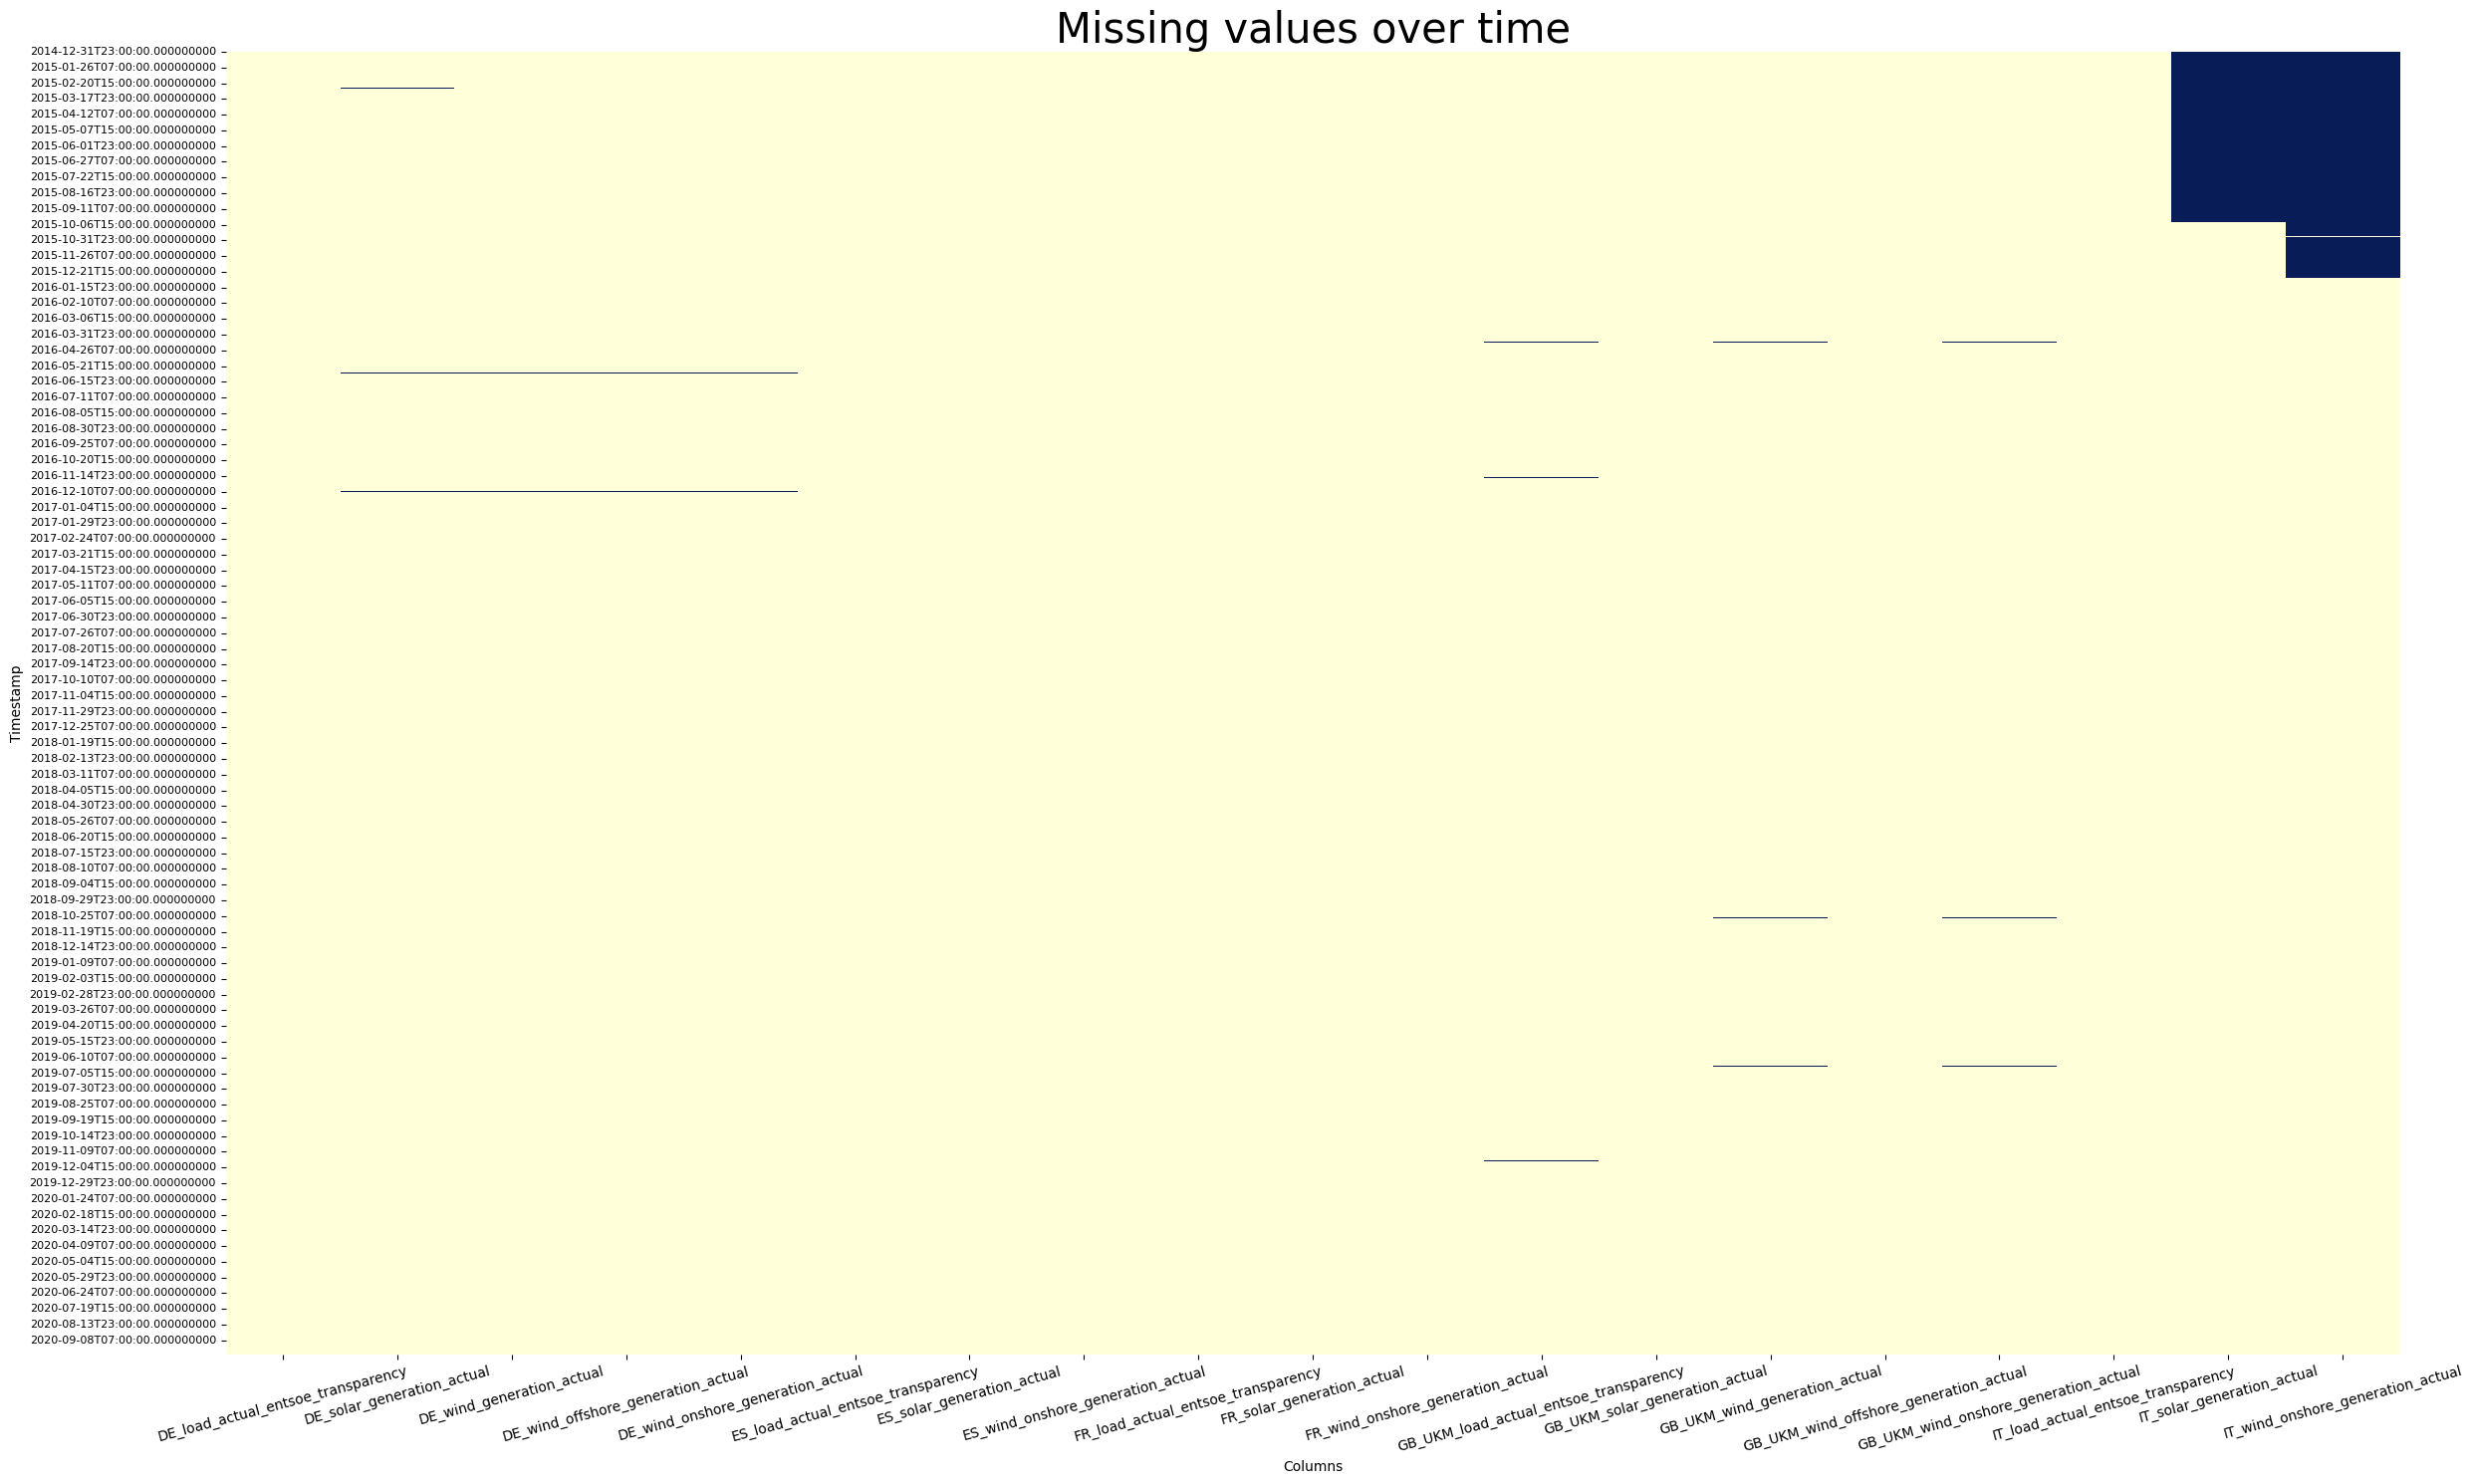

In [31]:
def plot_missings(data, rotation=15):
    plt.figure(figsize=(25, 15))
    sns.heatmap(data.isnull(), cbar=False, cmap='YlGnBu')
    plt.title('Missing values over time', fontsize=30)
    plt.xlabel('Columns')
    plt.ylabel('Timestamp')
    plt.xticks(rotation=rotation, fontsize=10)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

plot_missings(df_top_5)

In [32]:
df_top_5.tail()

DE_load_actual_entsoe_transparency  \
date                                                      
2020-09-30 19:00:00                             57559.0   
2020-09-30 20:00:00                             54108.0   
2020-09-30 21:00:00                             49845.0   
2020-09-30 22:00:00                             46886.0   
2020-09-30 23:00:00                             45461.0   

                     DE_solar_generation_actual  DE_wind_generation_actual  \
date                                                                         
2020-09-30 19:00:00                         0.0                    10654.0   
2020-09-30 20:00:00                         0.0                    11836.0   
2020-09-30 21:00:00                         0.0                    12168.0   
2020-09-30 22:00:00                         0.0                    12533.0   
2020-09-30 23:00:00                         0.0                    12798.0   

                     DE_wind_offshore_generation_actual  \
date                                                      
2020-09-30 19:00:00                              4754.0   
2020-09-30 20:00:00                              5194.0   
2020-09-30 21:00:00                              5339.0   
2020-09-30 22:00:00                              5399.0   
2020-09-30 23:00:00                              5381.0   

                     DE_wind_onshore_generation_actual  \
date                                                     
2020-09-30 19:00:00                             5900.0   
2020-09-30 20:00:00                             6642.0   
2020-09-30 21:00:00                             6829.0   
2020-09-30 22:00:00                             7134.0   
2020-09-30 23:00:00                             7417.0   

                     ES_load_actual_entsoe_transparency  \
date                                                      
2020-09-30 19:00:00                             30860.0   
2020-09-30 20:00:00                             27994.0   
2020-09-30 21:00:00                             25706.0   
2020-09-30 22:00:00                             24926.0   
2020-09-30 23:00:00                                 NaN   

                     ES_solar_generation_actual  \
date                                              
2020-09-30 19:00:00                        29.0   
2020-09-30 20:00:00                        21.0   
2020-09-30 21:00:00                        21.0   
2020-09-30 22:00:00                        22.0   
2020-09-30 23:00:00                         NaN   

                     ES_wind_onshore_generation_actual  \
date                                                     
2020-09-30 19:00:00                             6047.0   
2020-09-30 20:00:00                             6617.0   
2020-09-30 21:00:00                             6636.0   
2020-09-30 22:00:00                             6783.0   
2020-09-30 23:00:00                                NaN   

                     FR_load_actual_entsoe_transparency  \
date                                                      
2020-09-30 19:00:00                             48210.0   
2020-09-30 20:00:00                             48210.0   
2020-09-30 21:00:00                             48058.0   
2020-09-30 22:00:00                             44869.0   
2020-09-30 23:00:00                                 NaN   

                     FR_solar_generation_actual  \
date                                              
2020-09-30 19:00:00                       142.0   
2020-09-30 20:00:00                       142.0   
2020-09-30 21:00:00                       143.0   
2020-09-30 22:00:00                       142.0   
2020-09-30 23:00:00                         NaN   

                     FR_wind_onshore_generation_actual  \
date                                                     
2020-09-30 19:00:00                             3632.0   
2020-09-30 20:00:00                             3965.0   
2020-09-30 21:00:00                             4201.0  

Italy has missing values at the start of the dataframe. Since we want to have unified periods, we should drop them.

In [33]:
# drop last day from df, because it is not full for IT solar generation and we cannot impute them later
# Find the last day in the DataFrame
last_day = df_top_5.index.date.max()

# Drop all observations from the last day
df_top_5 = df_top_5[df_top_5.index.date < last_day]

# The start of notna data
min_date = df_top_5.loc[df_top_5['IT_wind_onshore_generation_actual'].notna()].index.min()
df_top_5 = df_top_5[df_top_5.index > min_date]
min_date

Timestamp('2015-10-24 23:00:00')

In [34]:
# Check for missings again
df_top_5.isna().sum()

DE_load_actual_entsoe_transparency           0
DE_solar_generation_actual                  72
DE_wind_generation_actual                   74
DE_wind_offshore_generation_actual          74
DE_wind_onshore_generation_actual           72
ES_load_actual_entsoe_transparency           3
ES_solar_generation_actual                   8
ES_wind_onshore_generation_actual            8
FR_load_actual_entsoe_transparency          41
FR_solar_generation_actual                   5
FR_wind_onshore_generation_actual            5
GB_UKM_load_actual_entsoe_transparency     163
GB_UKM_solar_generation_actual              32
GB_UKM_wind_generation_actual              119
GB_UKM_wind_offshore_generation_actual      32
GB_UKM_wind_onshore_generation_actual      119
IT_load_actual_entsoe_transparency           0
IT_solar_generation_actual                   9
IT_wind_onshore_generation_actual         1617
dtype: int64

In [35]:
selected_columns = [col for col in df_top_5.columns if 'load' in col or 'solar' in col]

In [36]:
# Impute missing values for Load and Solar with previous day observations at the same time
columns_shift = df_top_5[selected_columns].shift(freq='24H')

# Fill missing values with values from the previous day
df_top_5 = df_top_5.fillna(columns_shift)

# Fill wind columns with linear/time interpolation
# In our case it is linear interpolation (because distance between time points is the same)
df_top_5.interpolate(method='time', axis=0, inplace=True) 

In [37]:
df_top_5.isna().sum()

DE_load_actual_entsoe_transparency        0
DE_solar_generation_actual                0
DE_wind_generation_actual                 0
DE_wind_offshore_generation_actual        0
DE_wind_onshore_generation_actual         0
ES_load_actual_entsoe_transparency        0
ES_solar_generation_actual                0
ES_wind_onshore_generation_actual         0
FR_load_actual_entsoe_transparency        0
FR_solar_generation_actual                0
FR_wind_onshore_generation_actual         0
GB_UKM_load_actual_entsoe_transparency    0
GB_UKM_solar_generation_actual            0
GB_UKM_wind_generation_actual             2
GB_UKM_wind_offshore_generation_actual    0
GB_UKM_wind_onshore_generation_actual     2
IT_load_actual_entsoe_transparency        0
IT_solar_generation_actual                0
IT_wind_onshore_generation_actual         0
dtype: int64

In [38]:
# delete first day, because of the remaining missing values
min_date = df_top_5.index.date.min()
df_top_5 = df_top_5[df_top_5.index.date > min_date]

# 6. Visual Analysis of Time Series

In [39]:
# Extract year and month from the index
df_top_5.loc[:, 'DayOfWeek'] = df_top_5.index.dayofweek
df_top_5.loc[:, 'DayOfMonth'] = df_top_5.index.day
df_top_5.loc[:, 'Year'] = df_top_5.index.year
df_top_5.loc[:, 'Month'] = df_top_5.index.month
df_top_5['HourOfDay'] = df_top_5.index.hour
df_top_5['WeekOfYear'] = df_top_5.index.isocalendar().week

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_seasonality(data, frequency='Month', 
                     hue='Year', num_cols=3, title=None):
    """
    Plots the seasonality of the time series.

    Args:
        data (pandas.DataFrame): The time series to plot.
        frequency (str): The frequency of the time series (default: 'Month').
        hue (str): Subsets of the data (default: 'Year').
        num_cols (int): Number of plots
        title (str): The title of the plot (default: None).
    """
    num_cols = num_cols
    num_rows = 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

    for i, ax in enumerate(axes.flat):
        if i < len(data.columns):
            col = data.columns[i]
            sns.lineplot(ax=ax, data=data, x=frequency, y=col, 
                         hue=hue, palette='viridis', errorbar=None,
                         linewidth=2.5, markers=True)
            ax.set_title(f'{col}')
            ax.set_xlabel(frequency)
            ax.set_ylabel('Value')
            ax.legend(title=hue, loc = 'upper right')
            
        else:
            ax.axis('off')  

    fig.suptitle(title, fontsize=30)   
    plt.tight_layout()
    plt.show()


Expectedly, here is a yearly seasonality in the time series. 
For example, load: at winter months - more consumption (because days are shorter, it is cold - more electricity consumption).
Also at winter is more windy - more wind generation and less sunny - less solar generation.

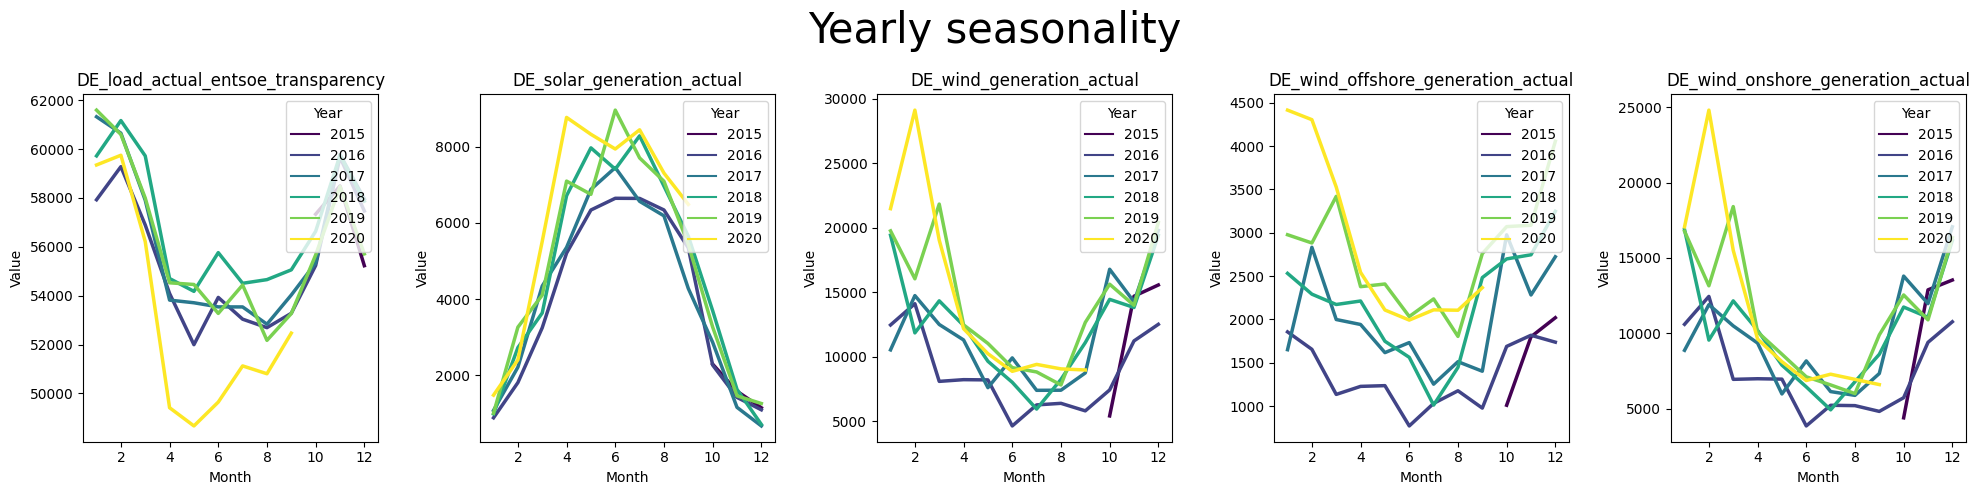

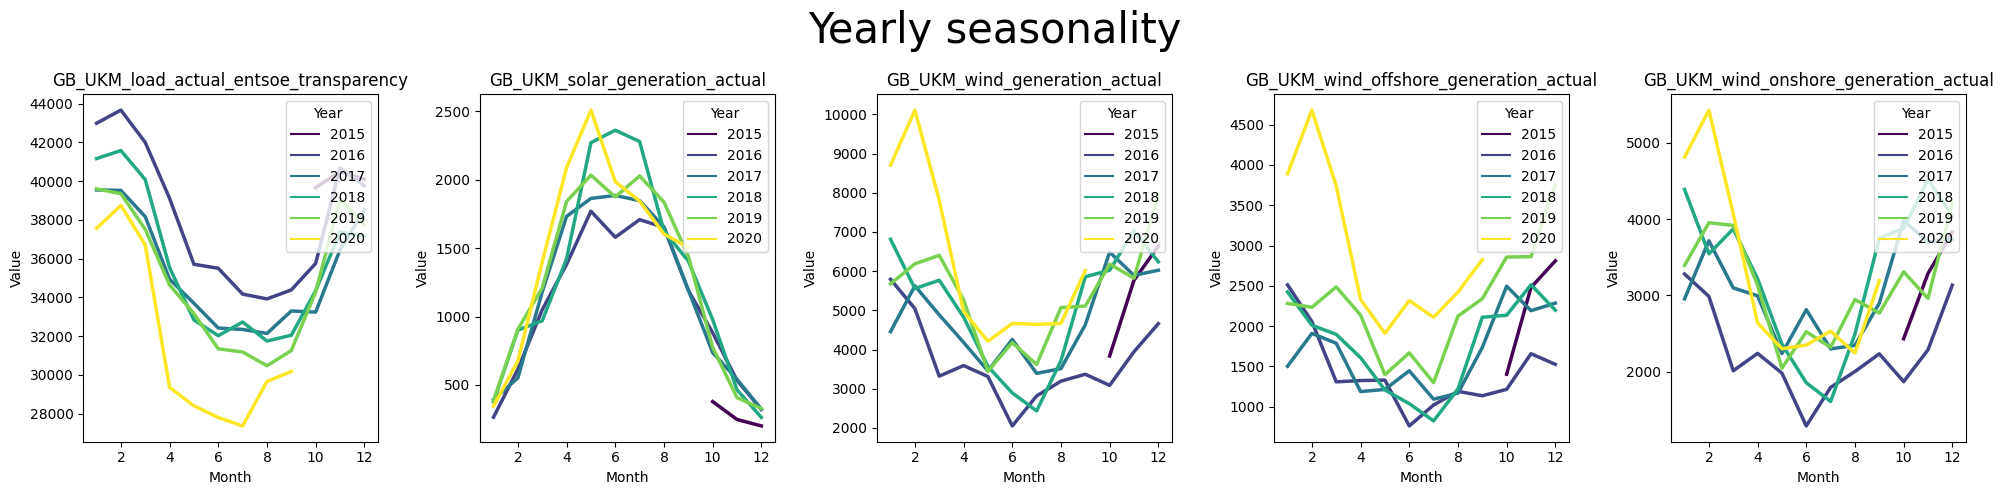

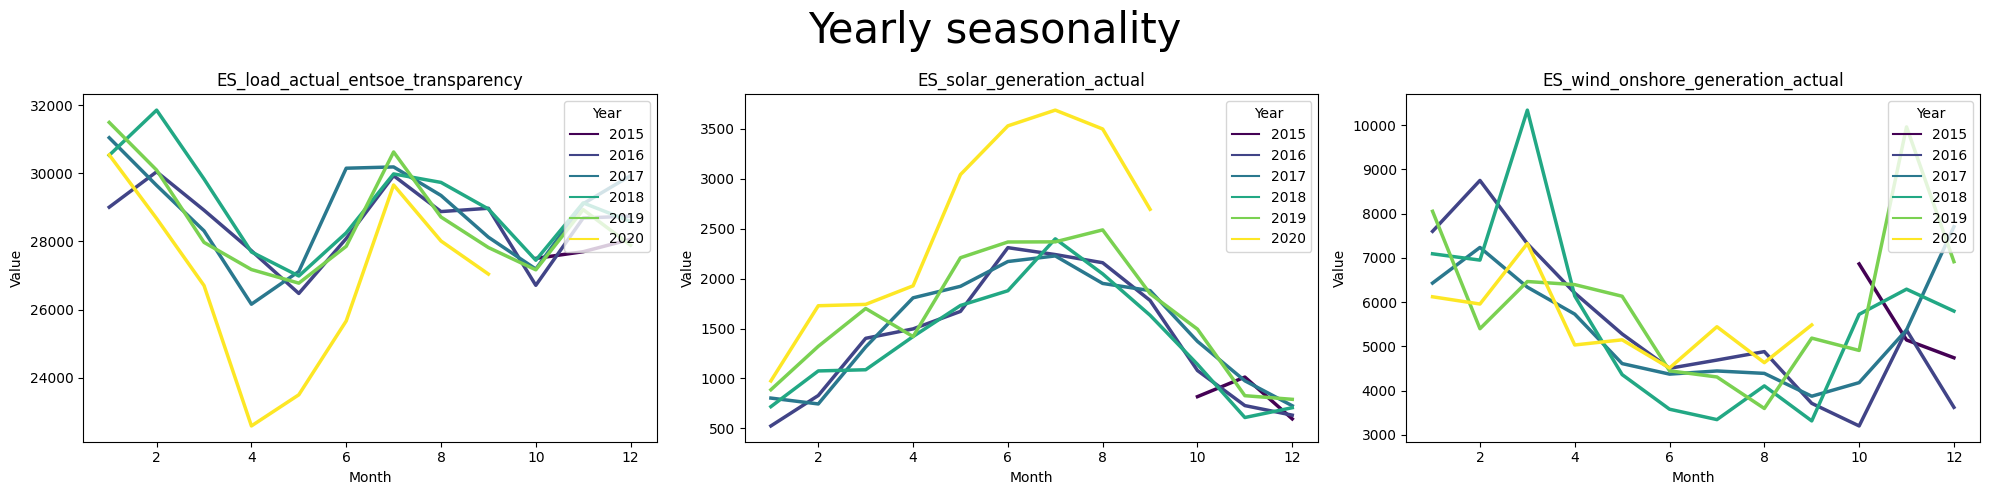

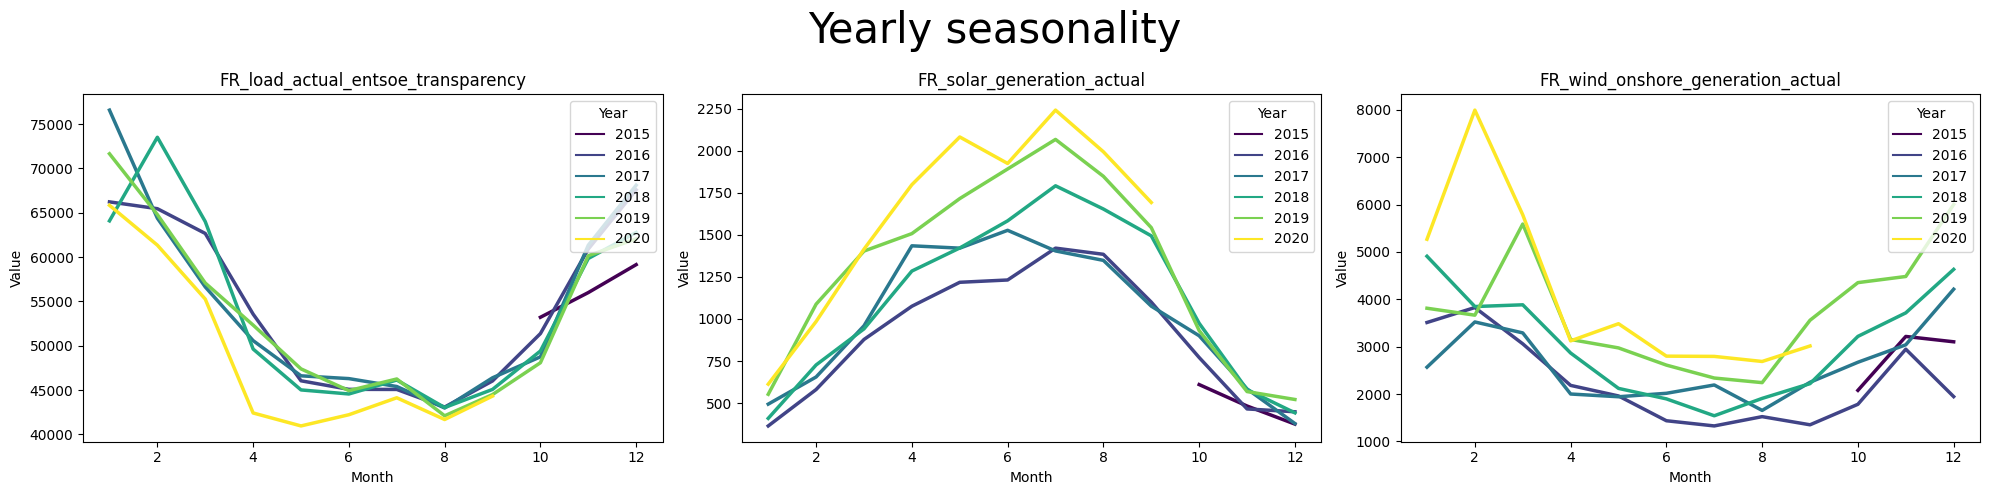

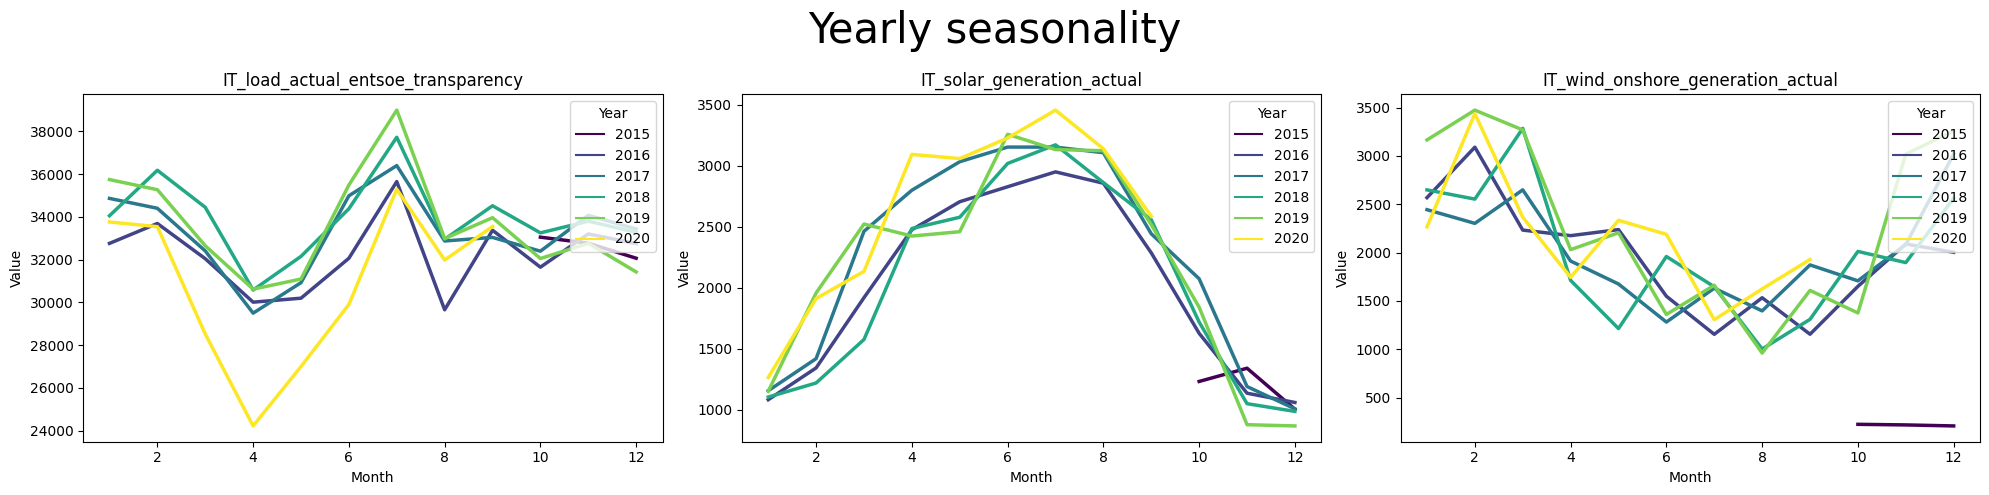

In [41]:
top_5_countries = ['DE', 'GB', 'ES', 'FR', 'IT']

for col in top_5_countries:

    data = df_top_5.filter(like=col, axis=1)

    n_cols = len(data.columns)

    # append cols with date infos
    data = pd.concat([data, df_top_5.iloc[:, -6:]], axis=1)

    plot_seasonality(data = data, num_cols=n_cols, title='Yearly seasonality')

There is, for example, a clear increasing trend on solar and wind generation in every year. For example in Germany, France and Britain. More capacities installed, more renewable energy is generated.

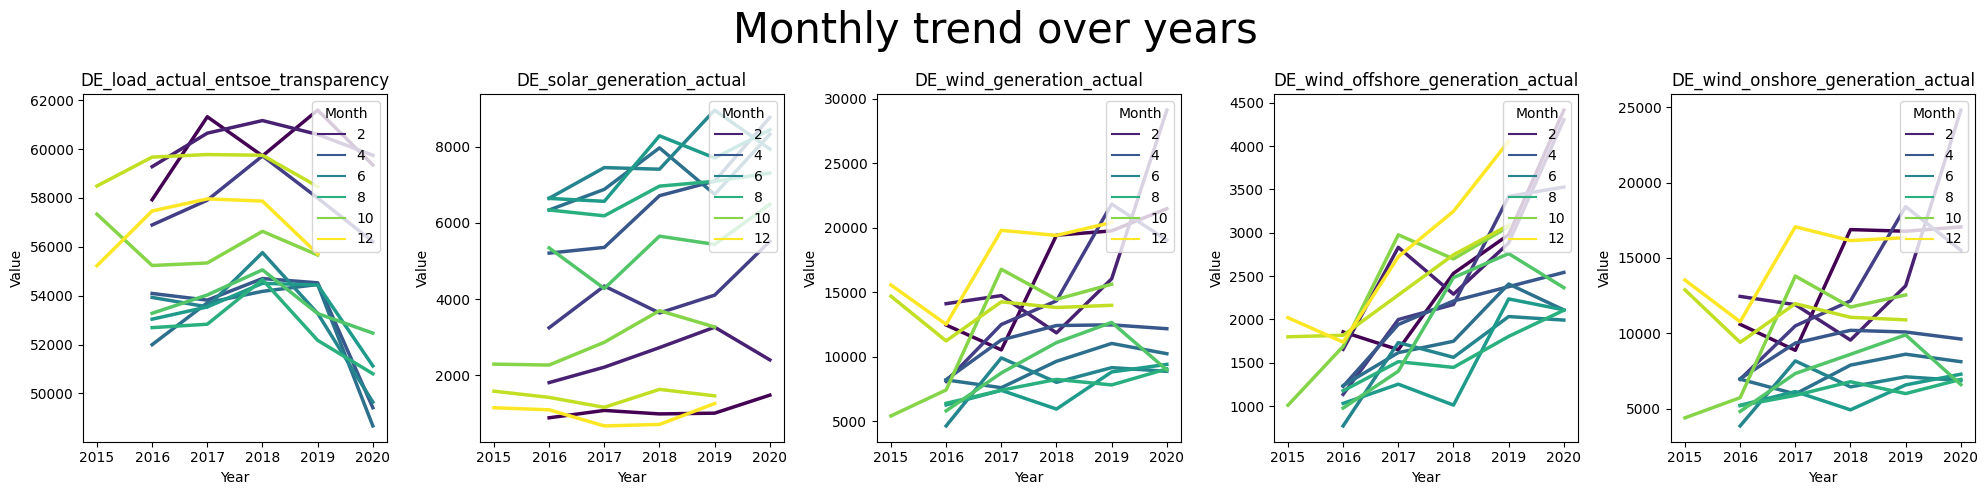

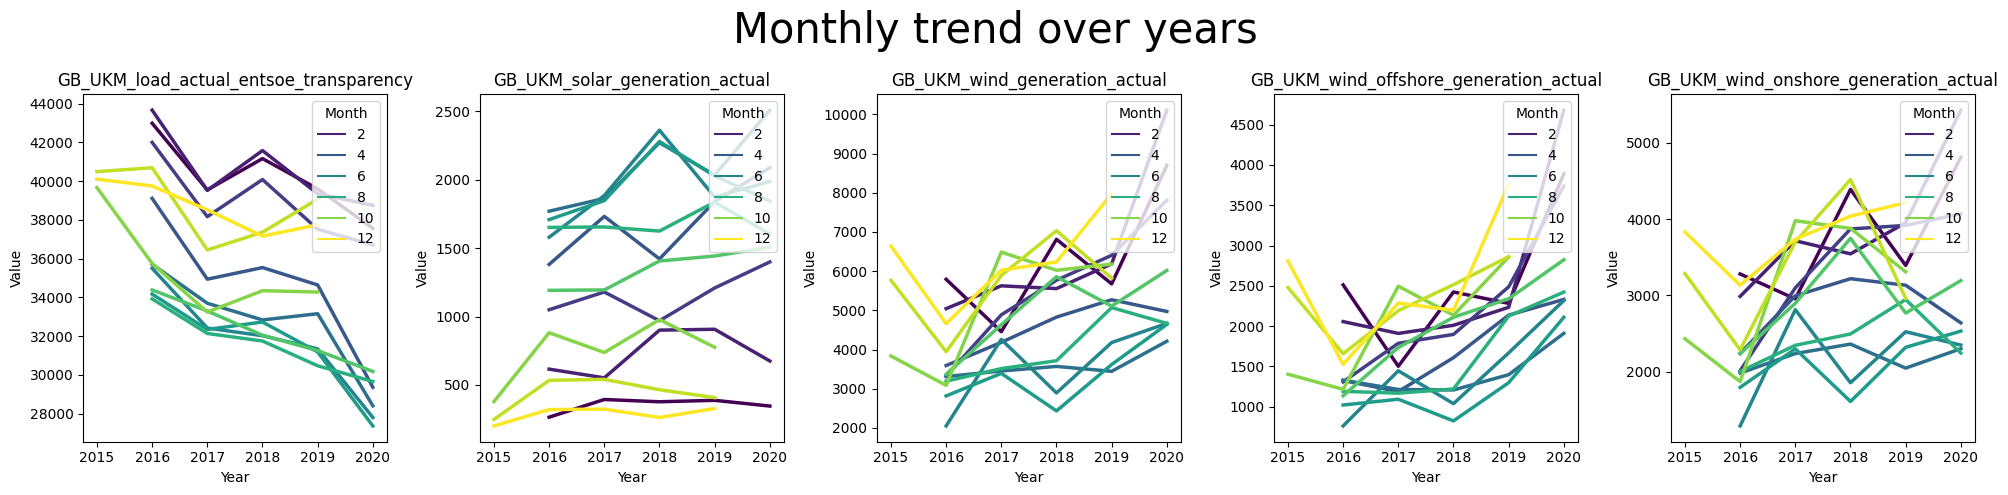

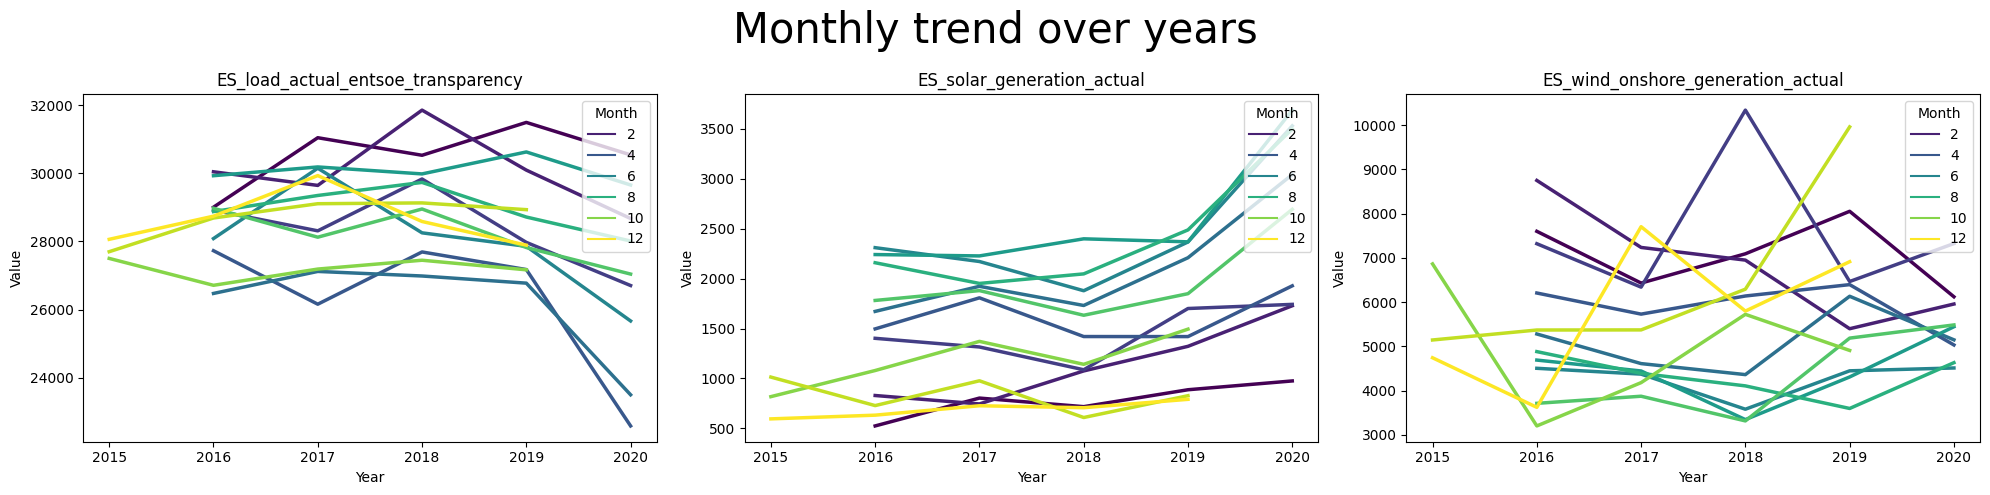

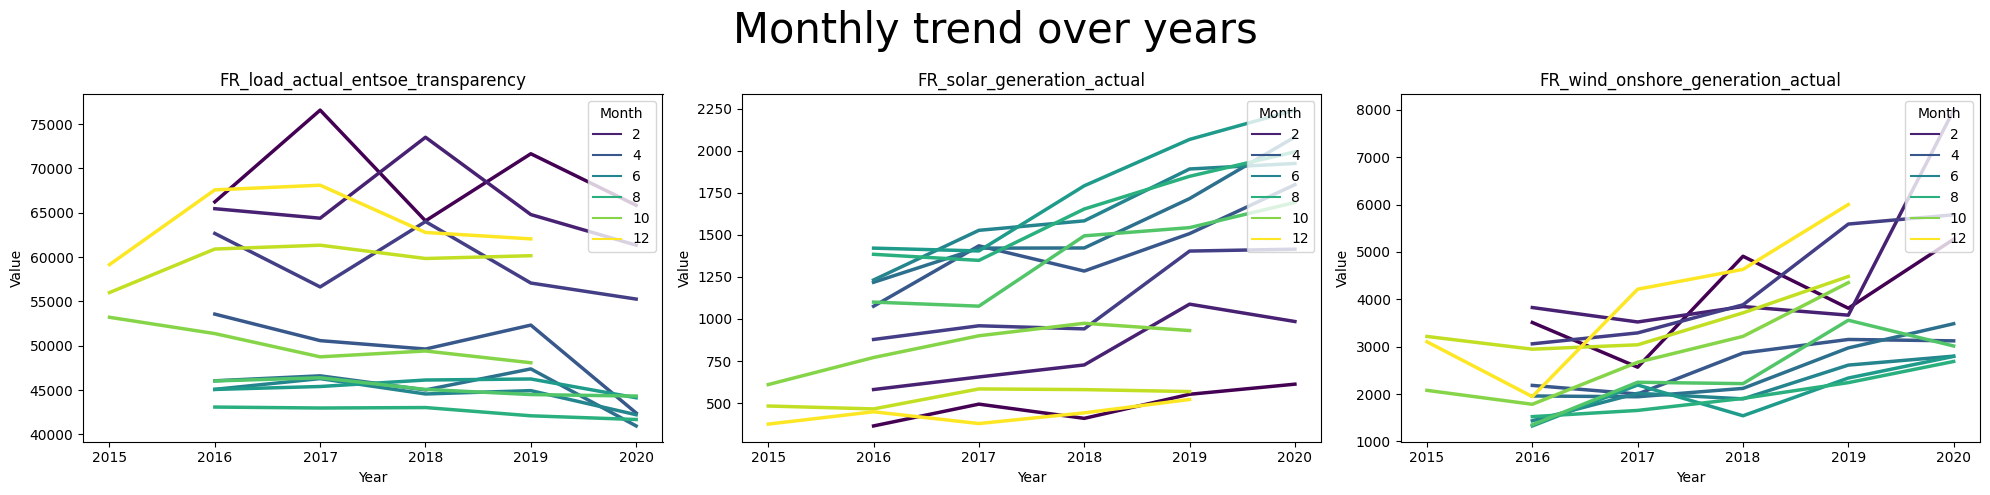

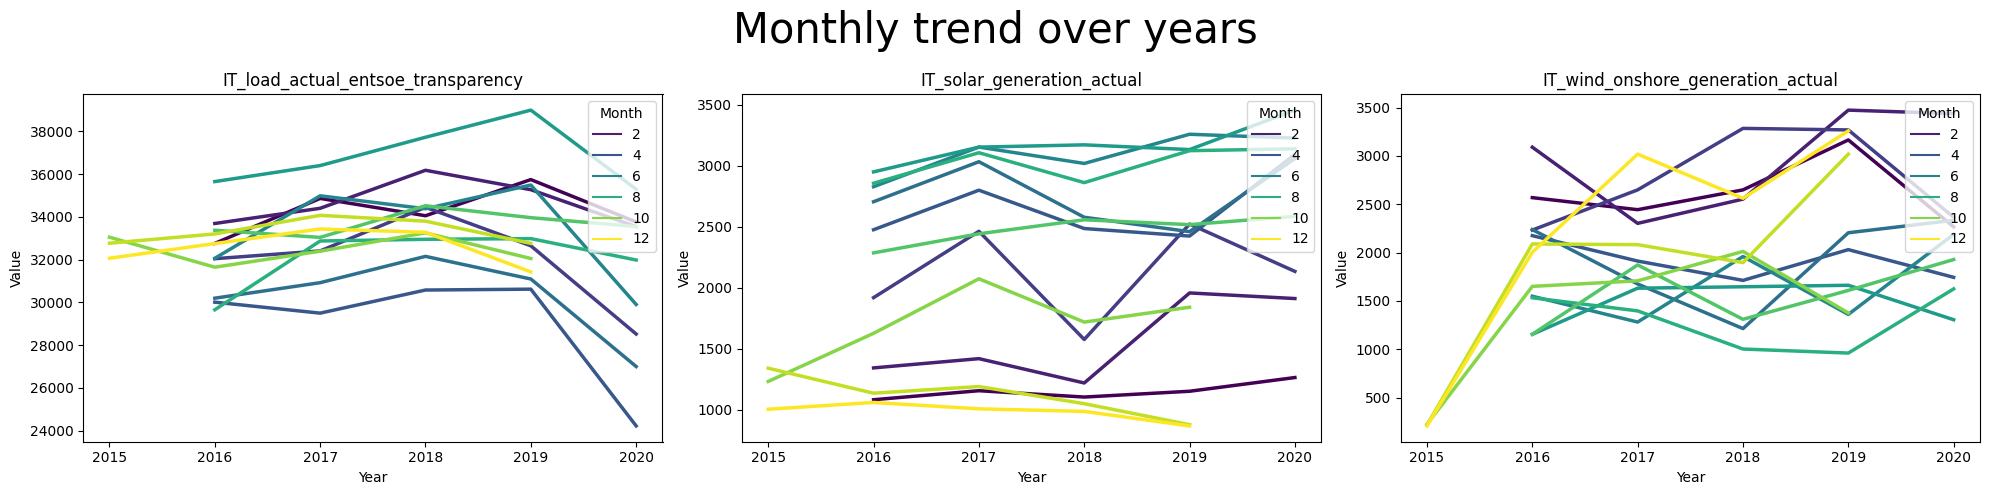

In [42]:
for col in top_5_countries:

    data = df_top_5.filter(like=col, axis=1)

    n_cols = len(data.columns)

    # append cols with date infos
    data = pd.concat([data, df_top_5.iloc[:, -6:]], axis=1)

    plot_seasonality(data = data, frequency='Year', hue='Month', num_cols=n_cols, title='Monthly trend over years')


Daily seasonality of load and solar generation. Therefore, it makes sence to use this parameter in ARIMA model.

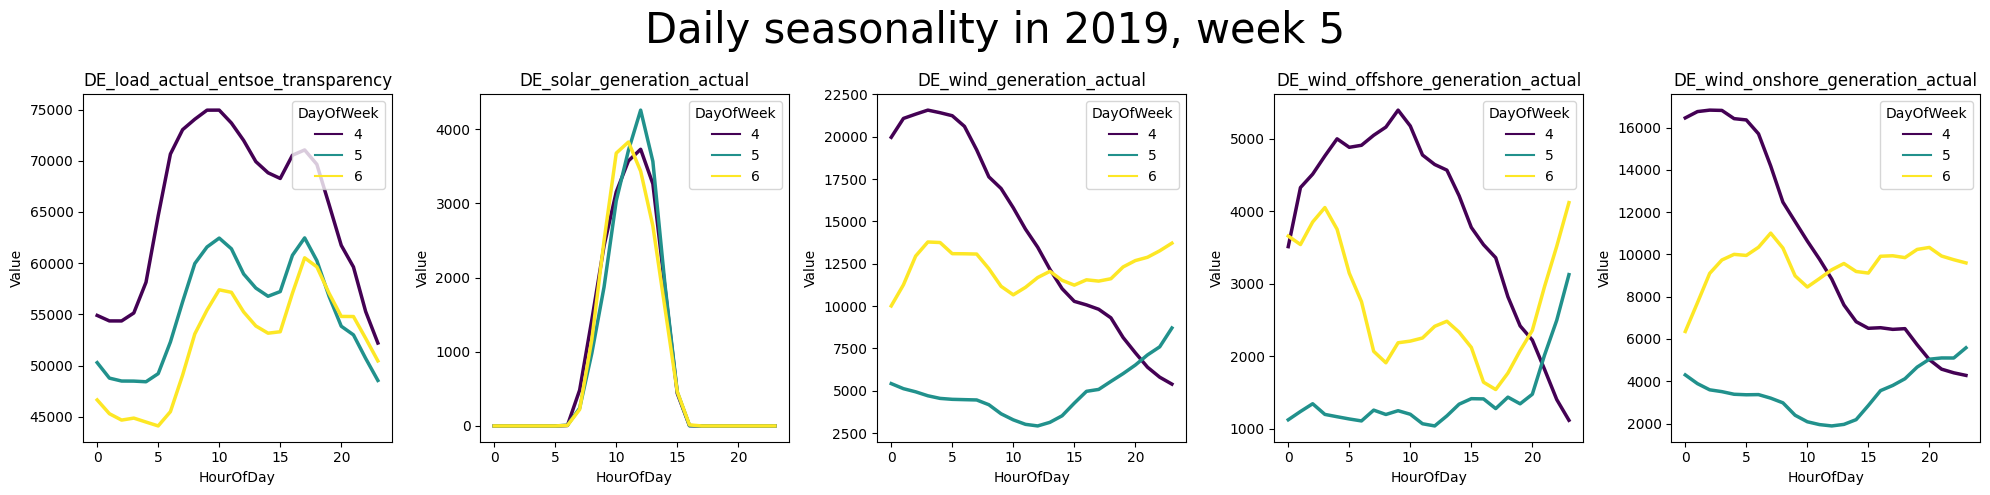

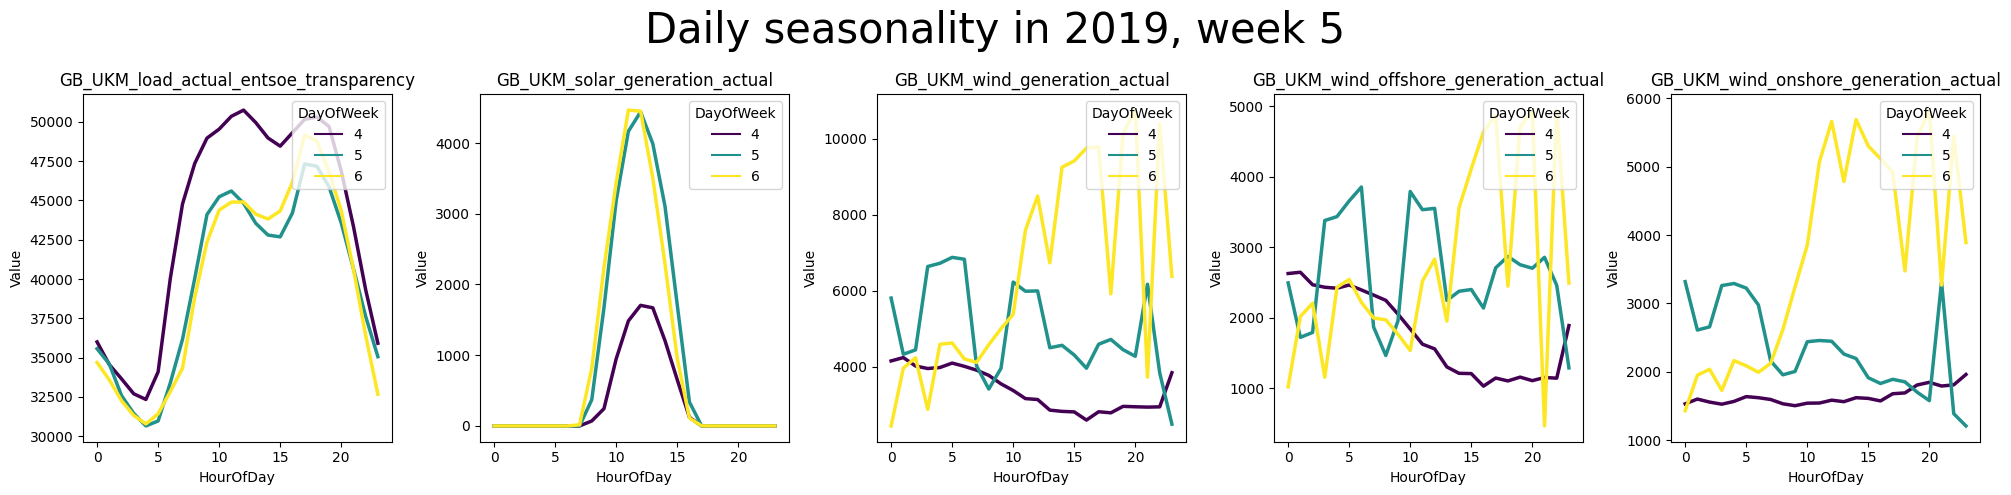

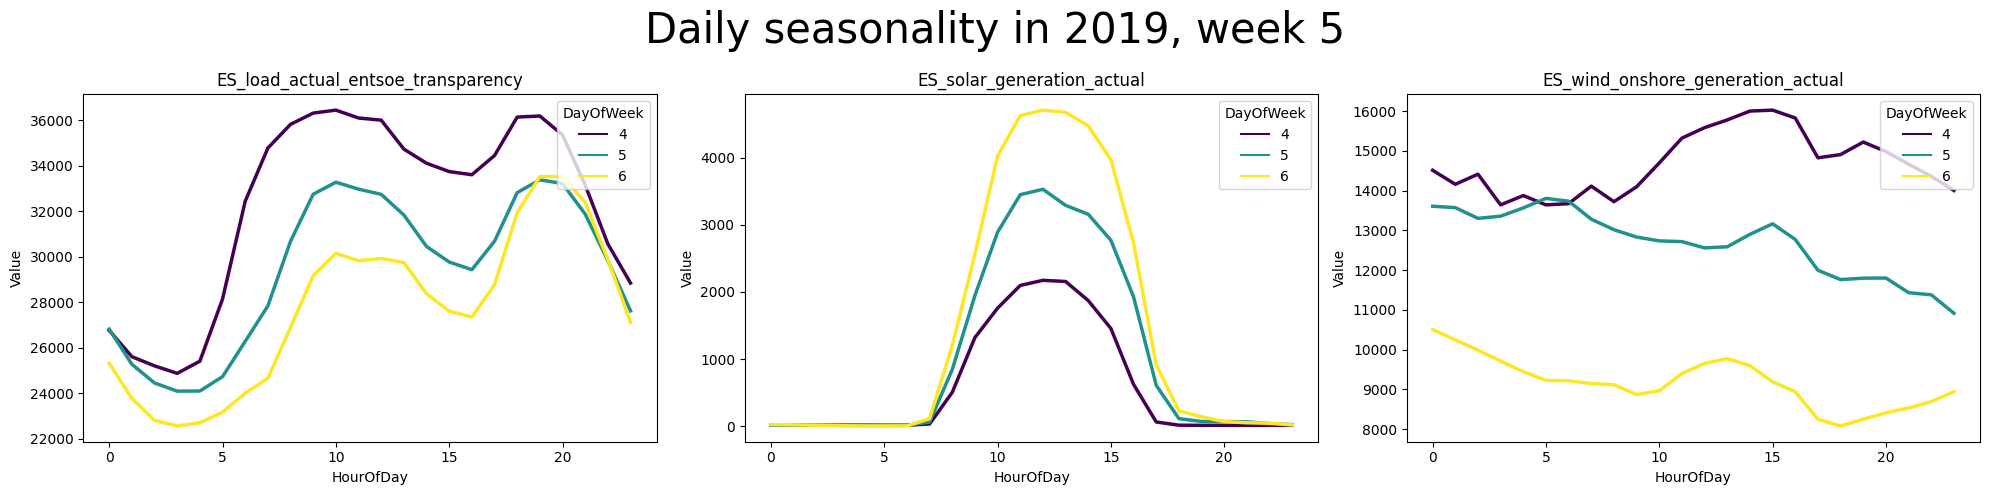

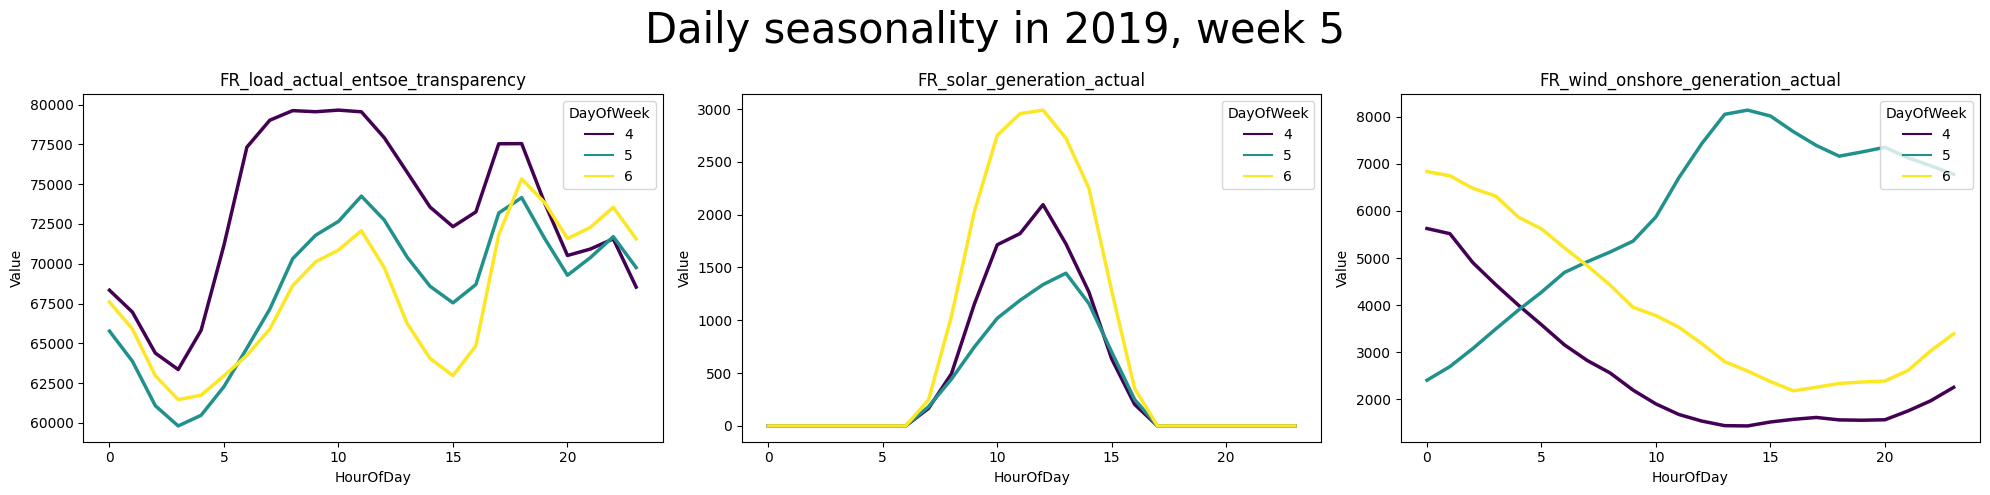

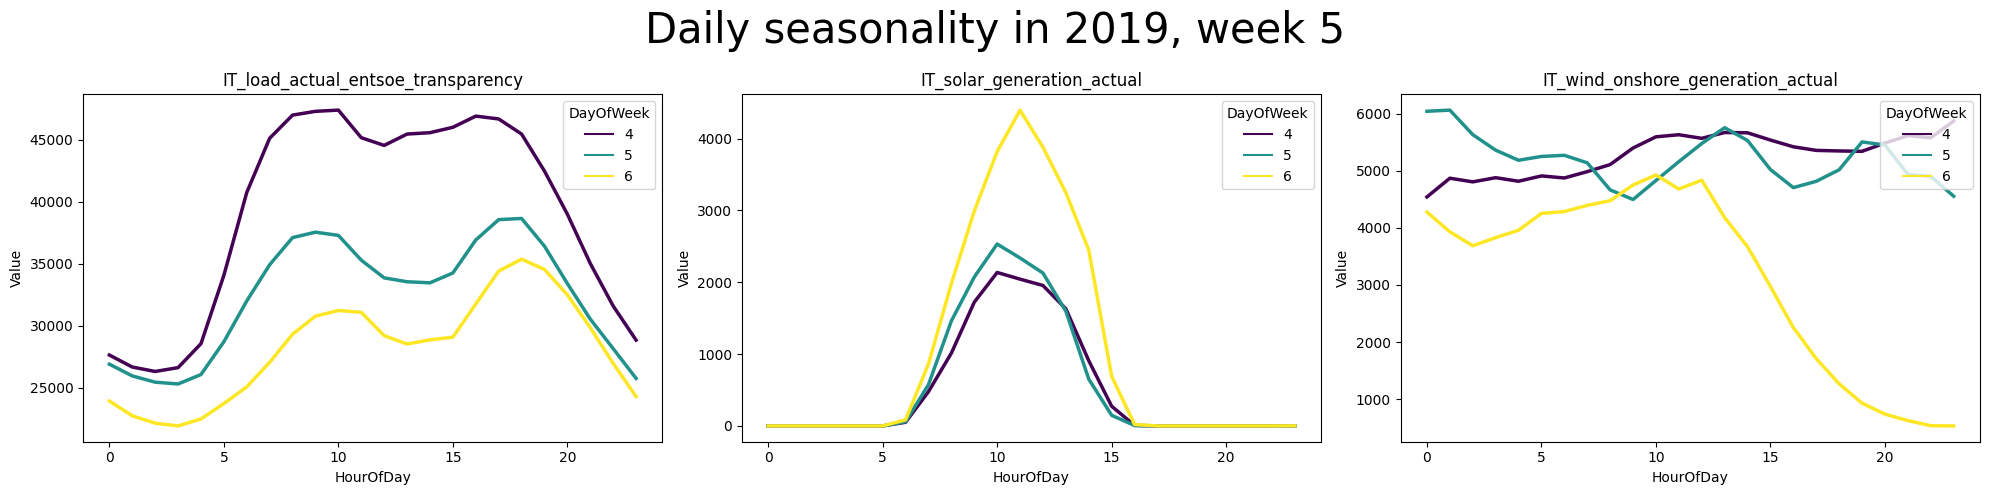

In [43]:
for col in top_5_countries:

    data = df_top_5.filter(like=col, axis=1)

    n_cols = len(data.columns)

    # append cols with date infos
    data = pd.concat([data, df_top_5.iloc[:, -6:]], axis=1)

    plot_seasonality(data=data[(data.index.year==2019) & 
                                  (data.index.month==2) & 
                                  (data.index.isocalendar().week==5)],
                                  frequency='HourOfDay',
                                  hue='DayOfWeek',
                                  num_cols=n_cols,
                                  title = 'Daily seasonality in 2019, week 5')

Also, there is a weekly seasonality of load columns. It could be explained that there is more consumption of electricity during business days.
So, load has annual, weekly and daily seasonality. 

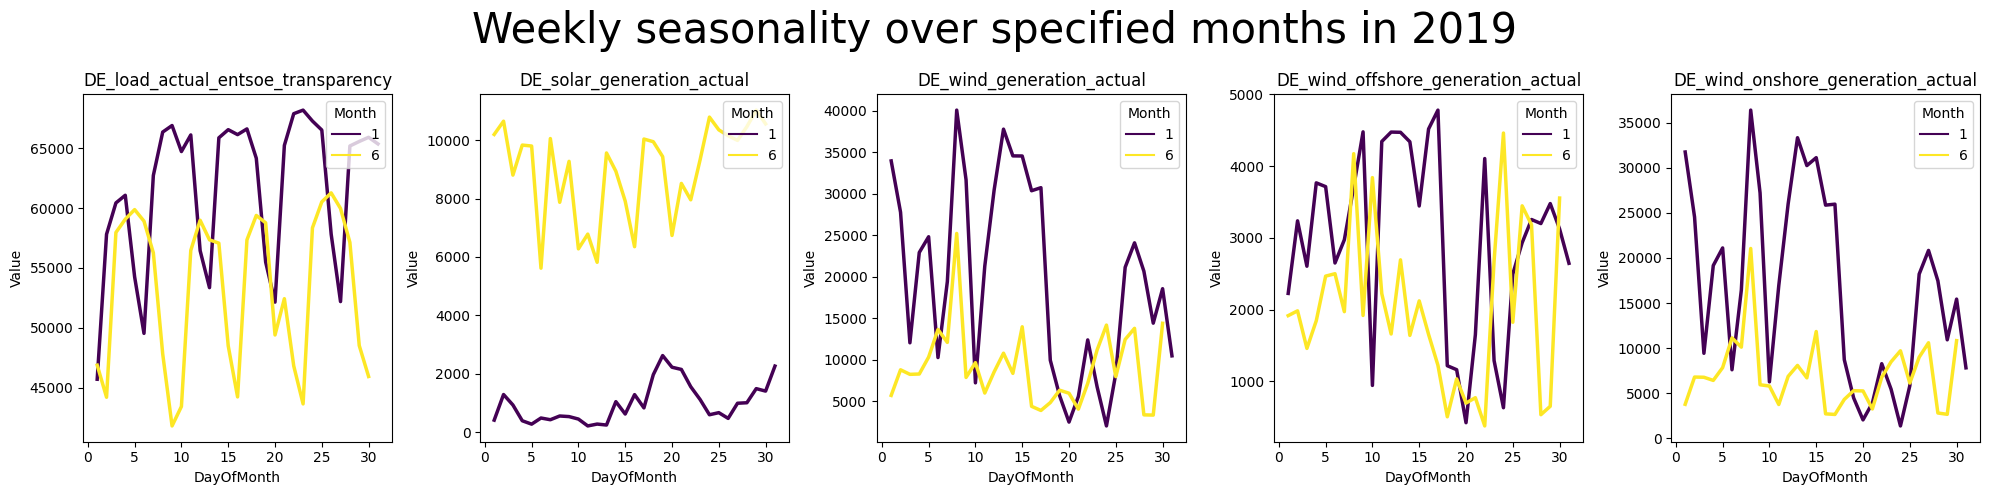

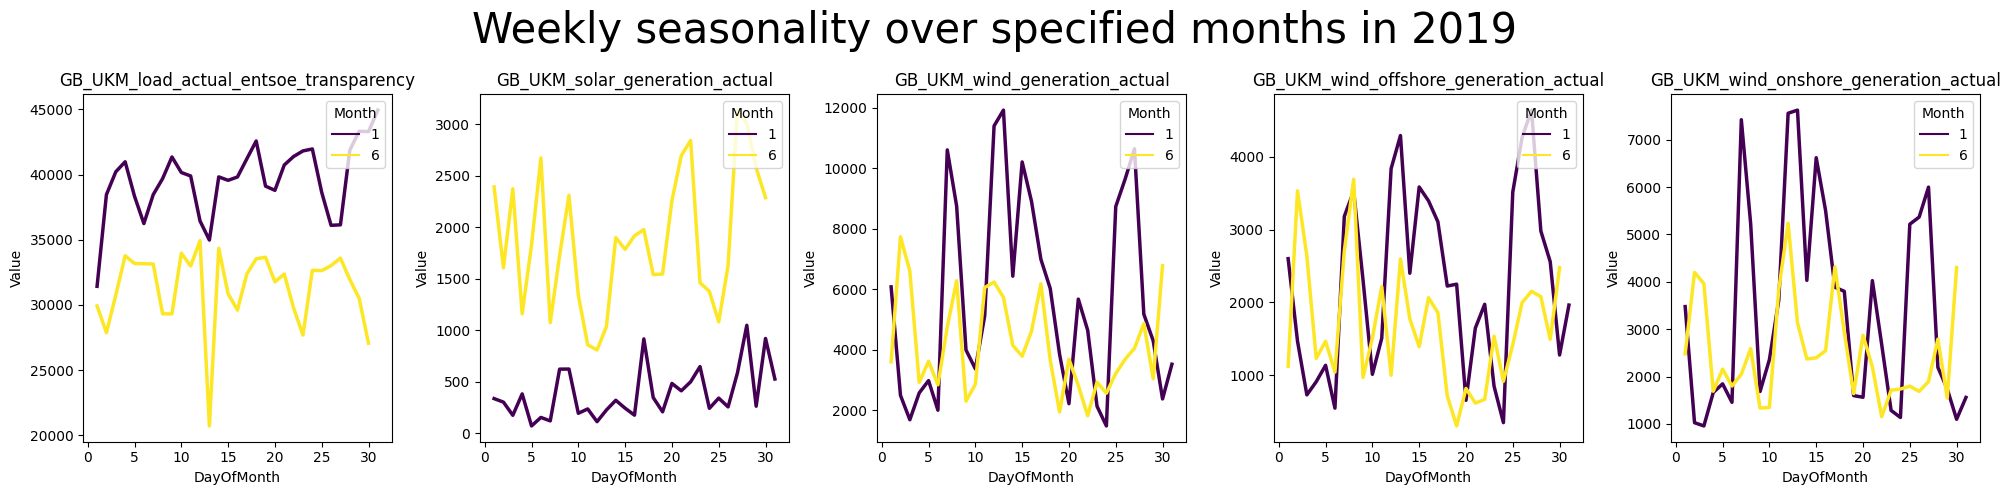

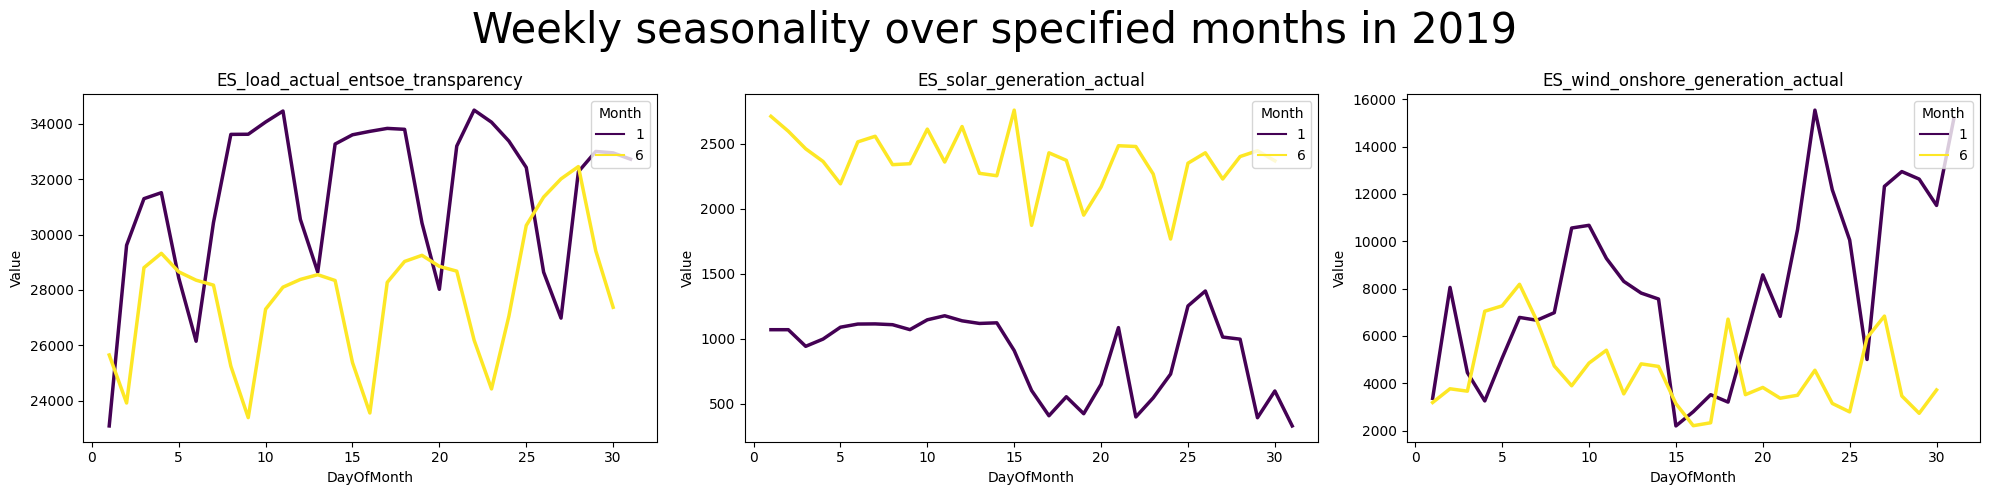

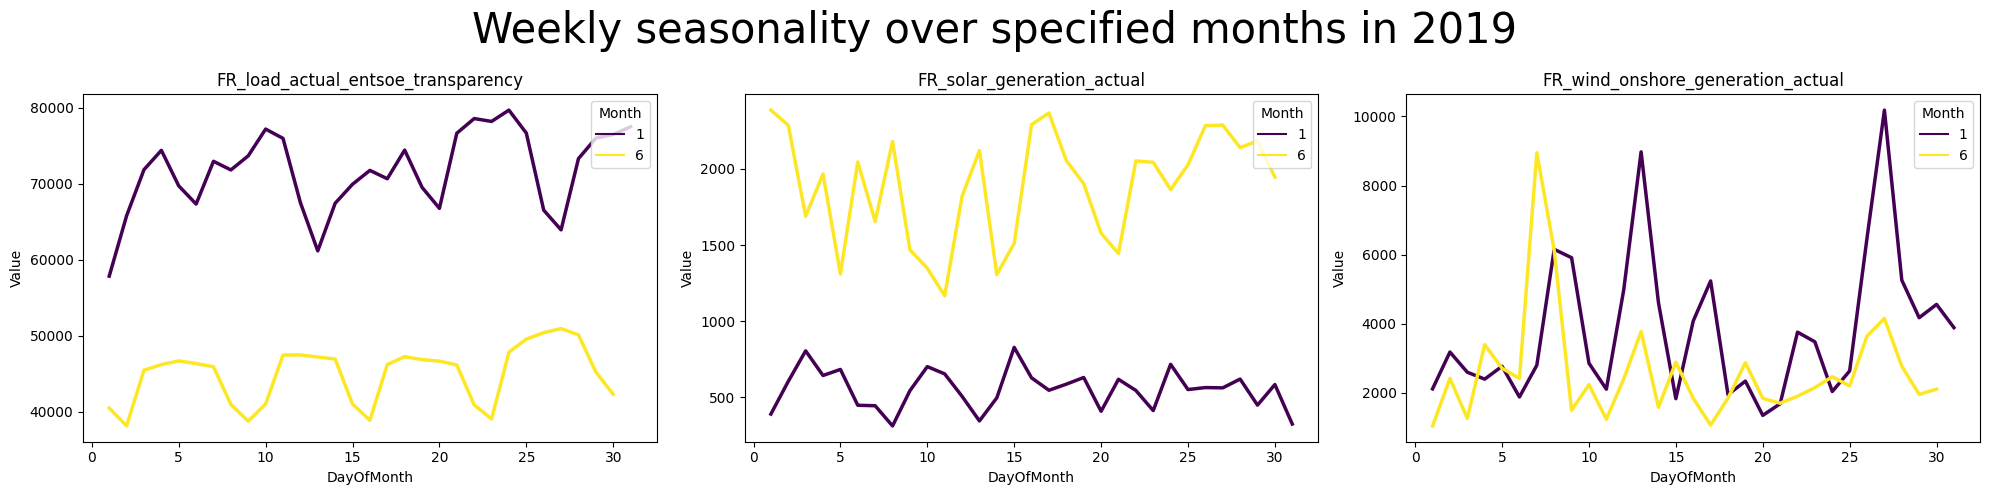

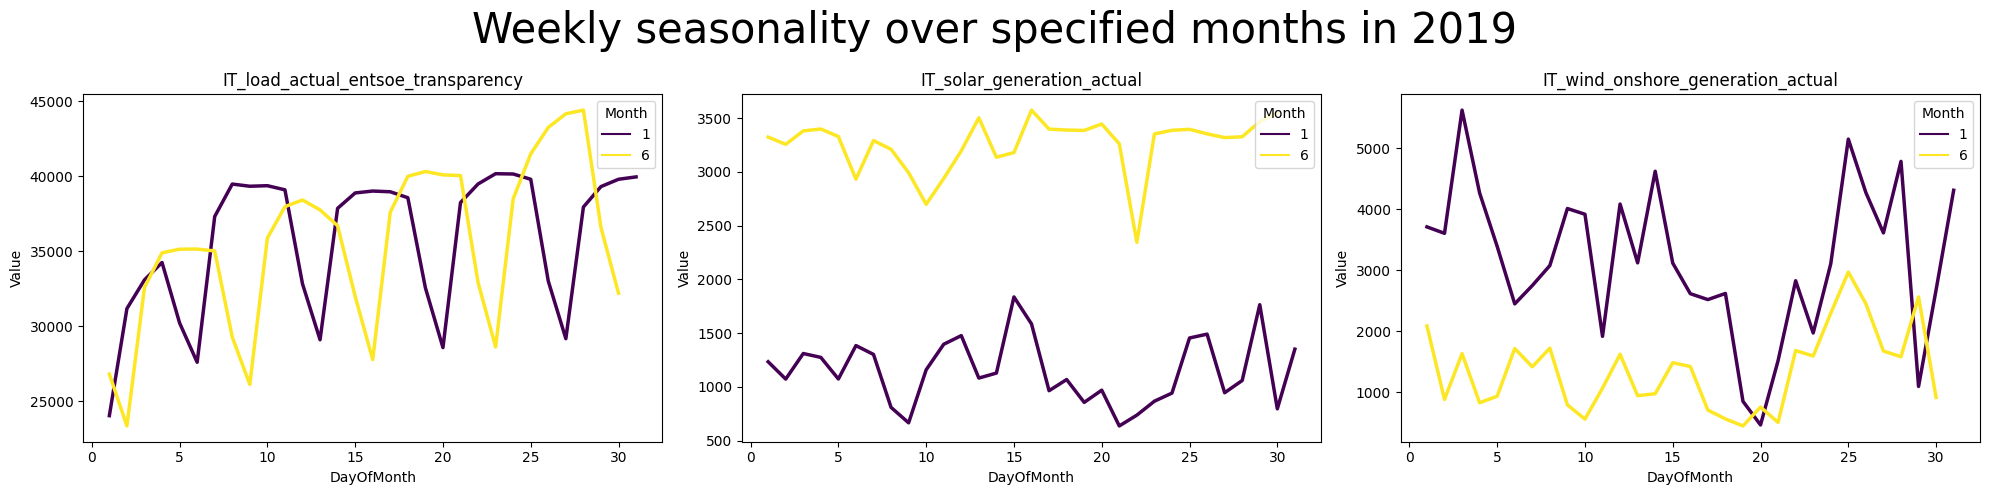

In [44]:
# Plot weekly seasonality for some months
# Only load has weekly seasonality
for col in top_5_countries:

    data = df_top_5.filter(like=col, axis=1)

    n_cols = len(data.columns)

    # append cols with date infos
    data = pd.concat([data, df_top_5.iloc[:, -6:]], axis=1)

    data = data[data.index.year == 2019]
    desired_months = [1, 6]
    data = data[data.index.month.isin(desired_months)]

    # Plot the seasonality for the desired months
    plot_seasonality(data=data, 
                    frequency='DayOfMonth', 
                    hue='Month',
                    num_cols=n_cols, 
                    title='Weekly seasonality over specified months in 2019')

In [45]:
def hist_plots(data, col, num_cols=3):

    """
    Plots the frequency of values in time series.

    Args:
        data (pandas.DataFrame): The time series to plot.
        col (str): The country name to plot.
        num_cols (int): Number of plots per country.
    """

    num_cols = num_cols
    num_rows = 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

    for i, ax in enumerate(axes.flat):
        if i < len(data.columns):
            col = data.columns[i]
            sns.histplot(ax=ax, data=data, x=col)
            ax.set_title(f'{col}')
        else:
            ax.axis('off')   
    plt.tight_layout()
    plt.show()

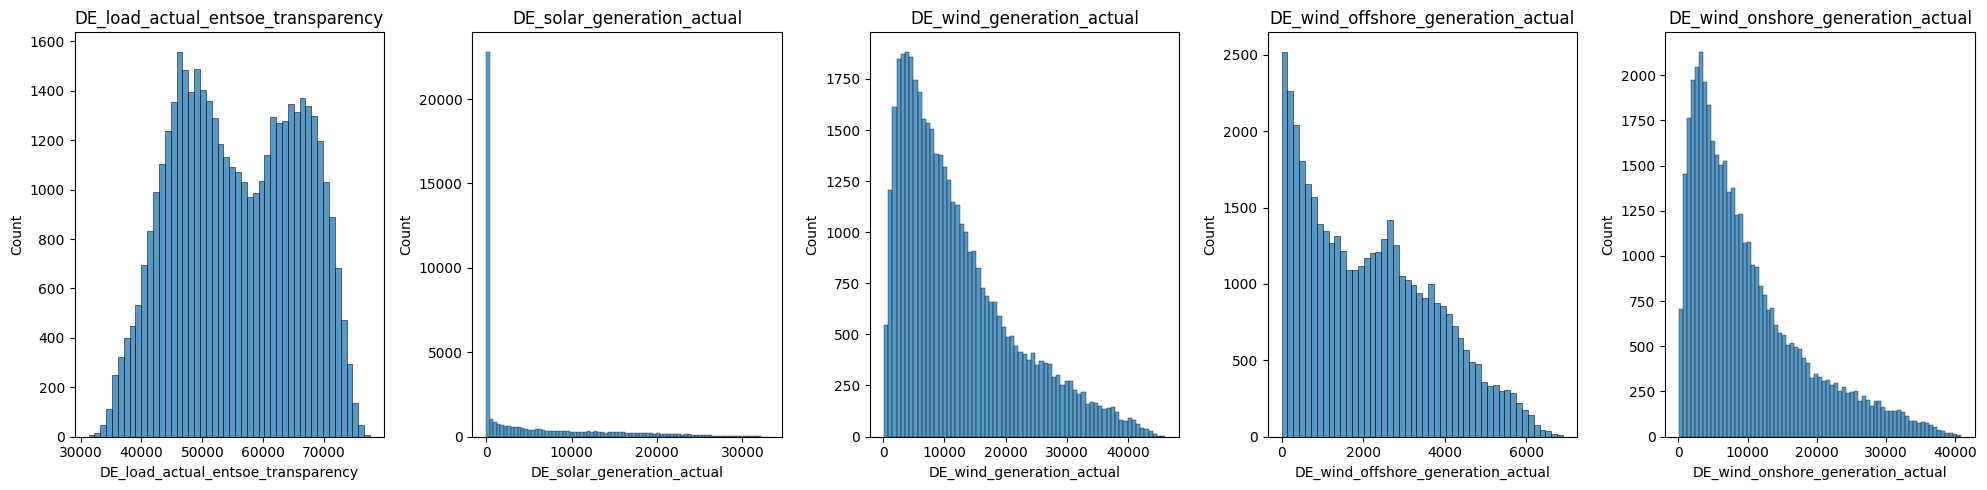

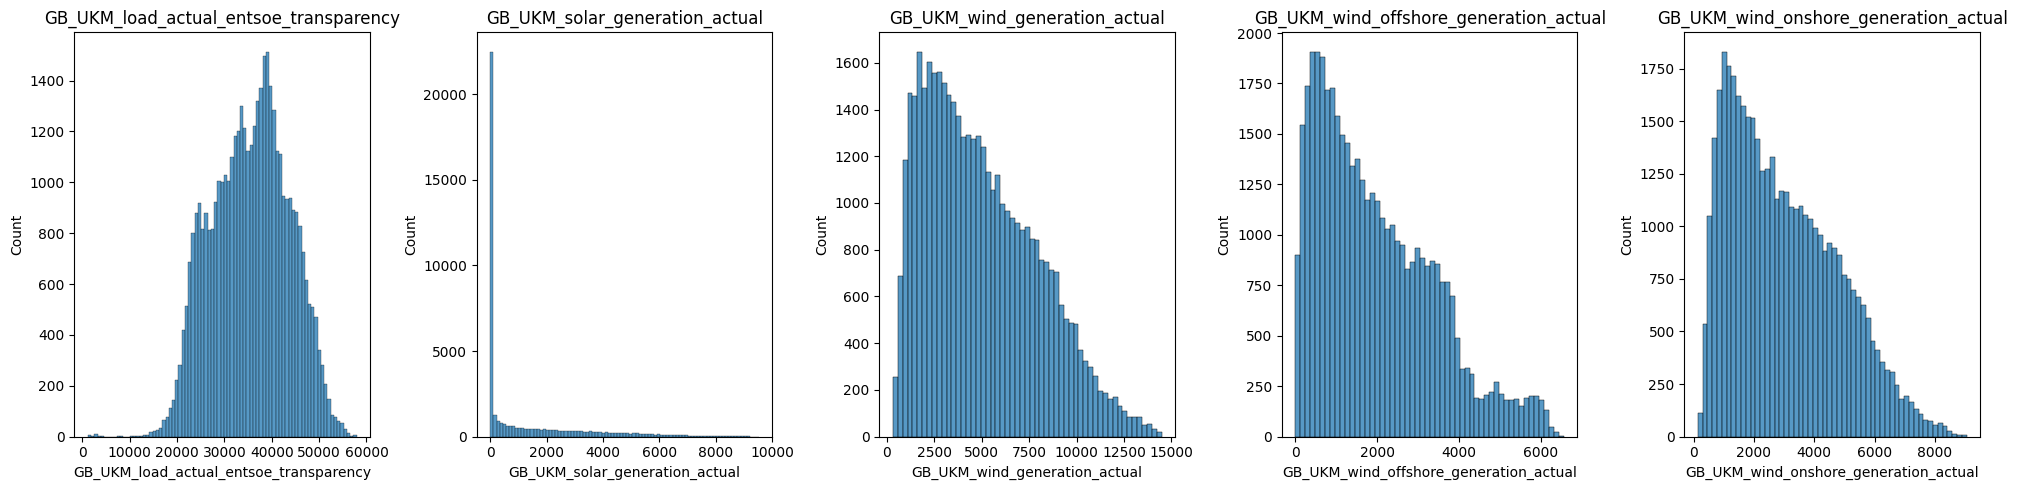

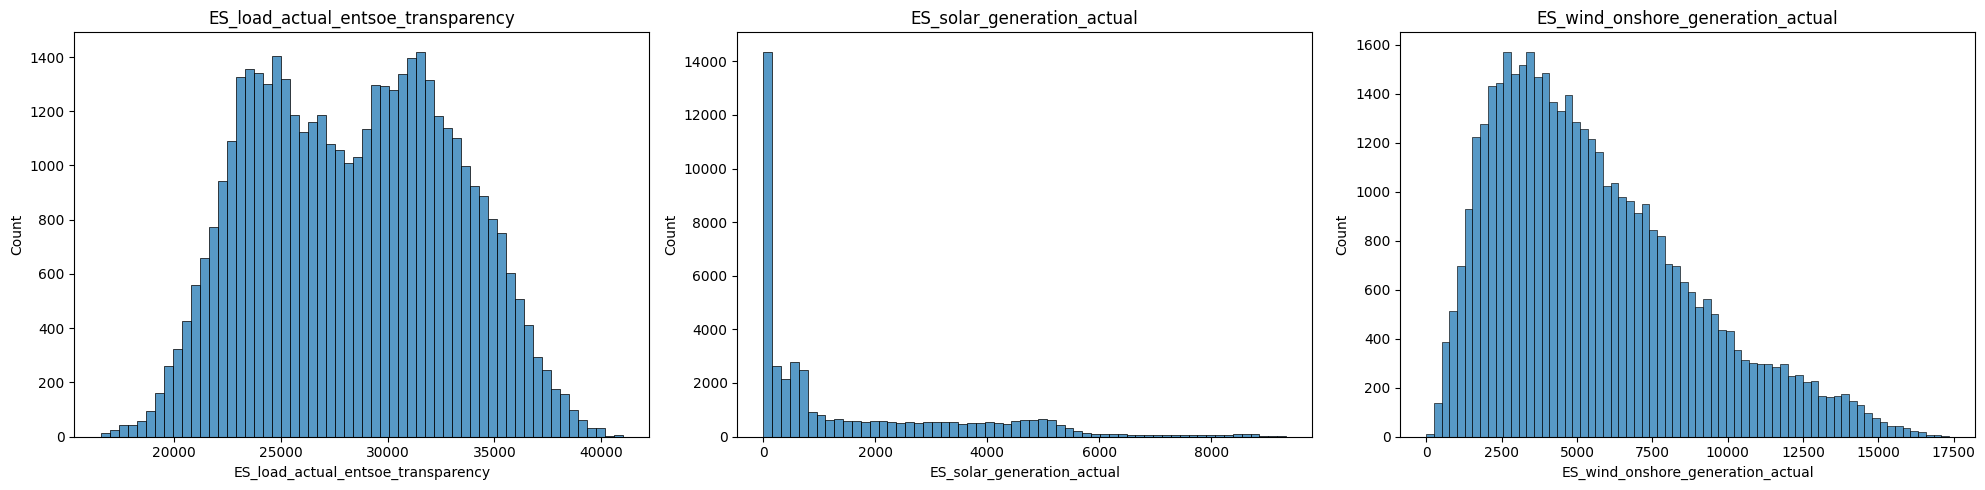

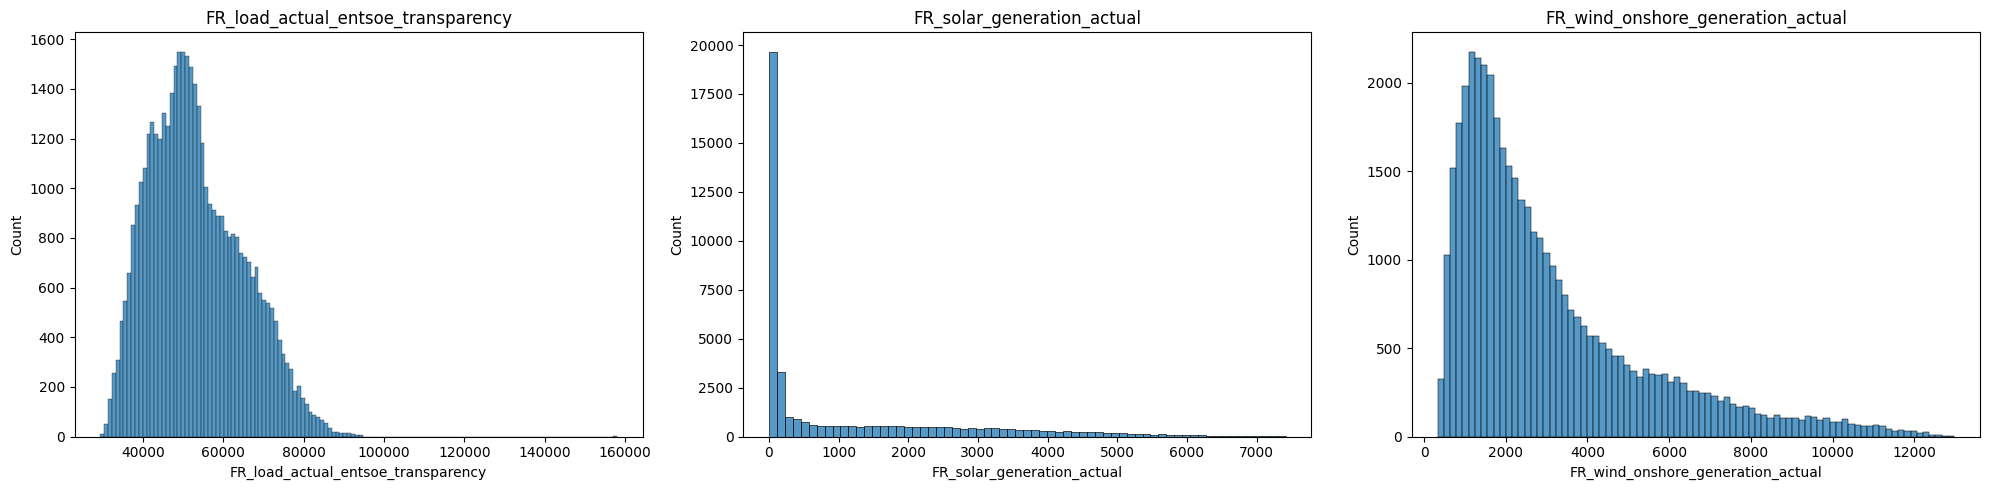

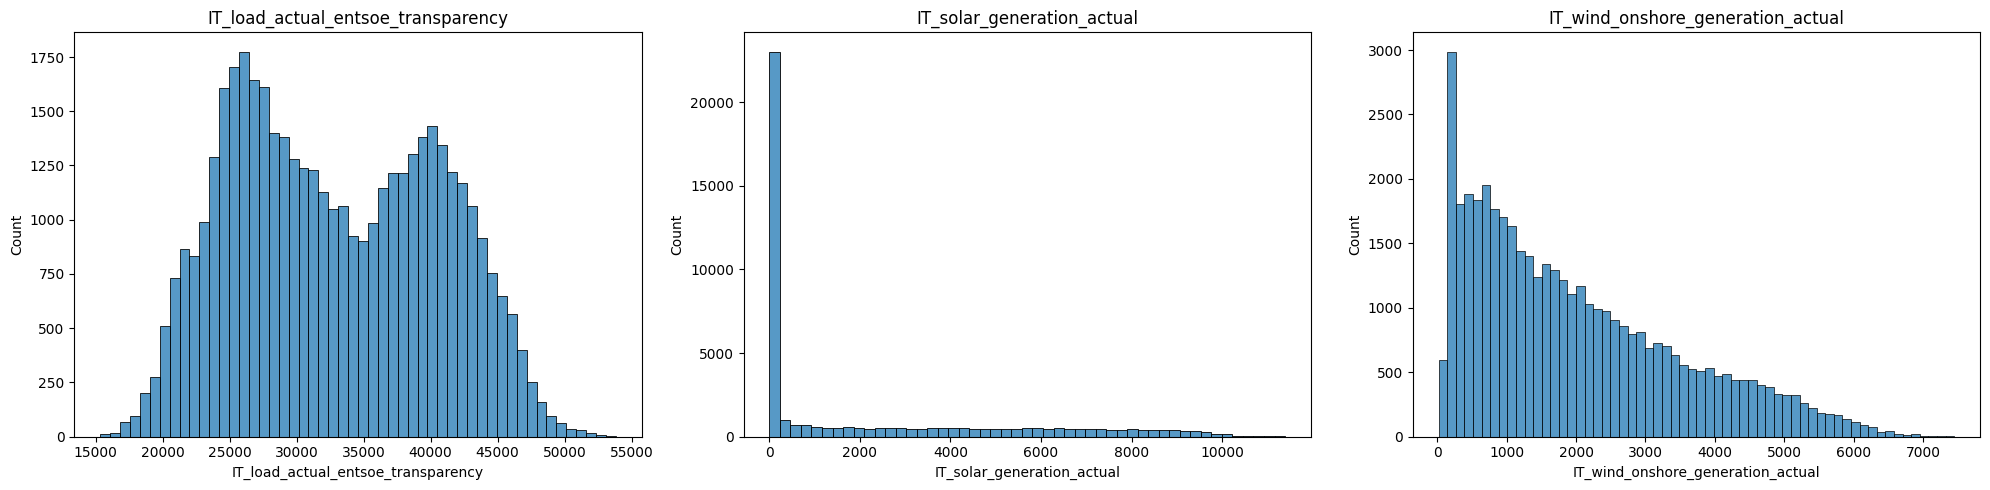

In [46]:
for col in top_5_countries:

    data = df_top_5.filter(like=col, axis=1)

    n_cols = len(data.columns)

    hist_plots(data = data, col=col, num_cols=n_cols)

# Granger causality????

In [47]:
df_top_5.to_csv("top_5_countries.csv")